<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#add-mapping-information" data-toc-modified-id="add-mapping-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>add mapping information</a></span><ul class="toc-item"><li><span><a href="#add-all-fetal-tissue-mapping-results" data-toc-modified-id="add-all-fetal-tissue-mapping-results-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>add all fetal tissue mapping results</a></span></li><li><span><a href="#add-primary(fetal/adult)-mapping-results" data-toc-modified-id="add-primary(fetal/adult)-mapping-results-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>add primary(fetal/adult) mapping results</a></span></li></ul></li><li><span><a href="#re-annotation" data-toc-modified-id="re-annotation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>re-annotation</a></span></li><li><span><a href="#plot-figures" data-toc-modified-id="plot-figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot figures</a></span><ul class="toc-item"><li><span><a href="#plot-sankey-plot" data-toc-modified-id="plot-sankey-plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>plot sankey plot</a></span></li><li><span><a href="#plot-3-level-for-final-figures" data-toc-modified-id="plot-3-level-for-final-figures-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>plot 3 level for final figures</a></span></li><li><span><a href="#plot-markers" data-toc-modified-id="plot-markers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>plot markers</a></span></li></ul></li><li><span><a href="#map-to-primary-(fetal/adult)" data-toc-modified-id="map-to-primary-(fetal/adult)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>map to primary (fetal/adult)</a></span></li><li><span><a href="#plot-mature" data-toc-modified-id="plot-mature-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>plot mature</a></span><ul class="toc-item"><li><span><a href="#ips-proportion" data-toc-modified-id="ips-proportion-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>ips proportion</a></span></li><li><span><a href="#FSC-proportion" data-toc-modified-id="FSC-proportion-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>FSC proportion</a></span></li><li><span><a href="#ASC-proportion" data-toc-modified-id="ASC-proportion-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>ASC proportion</a></span></li></ul></li><li><span><a href="#pesudotime" data-toc-modified-id="pesudotime-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>pesudotime</a></span><ul class="toc-item"><li><span><a href="#entrocytes" data-toc-modified-id="entrocytes-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>entrocytes</a></span></li><li><span><a href="#colonocytes" data-toc-modified-id="colonocytes-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>colonocytes</a></span></li></ul></li><li><span><a href="#others" data-toc-modified-id="others-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>others</a></span><ul class="toc-item"><li><span><a href="#hox-genes" data-toc-modified-id="hox-genes-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>hox genes</a></span></li></ul></li><li><span><a href="#other" data-toc-modified-id="other-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>other</a></span></li><li><span><a href="#de-genes" data-toc-modified-id="de-genes-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>de genes</a></span></li><li><span><a href="#main-plot" data-toc-modified-id="main-plot-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>main plot</a></span></li><li><span><a href="#cell-proportion" data-toc-modified-id="cell-proportion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>cell proportion</a></span></li><li><span><a href="#intestine-cells-maturity" data-toc-modified-id="intestine-cells-maturity-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>intestine cells maturity</a></span></li><li><span><a href="#compare-IPS/FSC/ASC" data-toc-modified-id="compare-IPS/FSC/ASC-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>compare IPS/FSC/ASC</a></span></li><li><span><a href="#map-to-fetal" data-toc-modified-id="map-to-fetal-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>map to fetal</a></span></li><li><span><a href="#RSS" data-toc-modified-id="RSS-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>RSS</a></span></li></ul></div>

In [42]:
import os
import sys
import re
import yaml
import math
from copy import copy
from collections import Counter

import torch
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import umap
import matplotlib.patches as mpatches

from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import make_interp_spline, BSpline

import gseapy

import warnings
warnings.filterwarnings('ignore')


## load data

In [2]:
project_dir = f"/home/xuq44/projects/hgioa/data/results/organoid_samples_summary"
results_dir = "new_20230705"
adata = sc.read_h5ad(f"{project_dir}/results/{results_dir}/intestine_scpoli_model/intestine_scpoli_integration.h5ad")


In [3]:
adata

AnnData object with n_obs × n_vars = 353140 × 1807
    obs: 'sort_batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1_late', 'level_2_late', 'level_3_late'
    uns: 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

<Axes: title={'center': 'publication'}, xlabel='UMAP1', ylabel='UMAP2'>

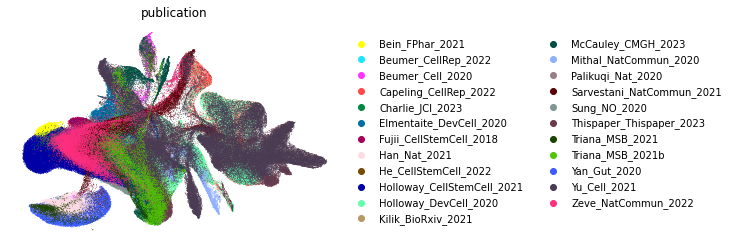

In [4]:
sc.pl.umap(adata, color=["publication"], 
       ncols=1, frameon=False, size=2, show=False, palette=sc.pl.palettes.godsnot_102)



In [5]:

adata.obs.derive= adata.obs.derive.astype('string')
adata.obs.loc[adata.obs.protocol=='transplant','derive'] = 'tIPS'

adata.obs.detail_tissue= adata.obs.detail_tissue.astype('string')
adata.obs.loc[adata.obs.detail_tissue.isna(),'detail_tissue']='IPS'

derive2=[]
for i,j,k in zip(adata.obs.derive, adata.obs.protocol, adata.obs.time):
    if j=='transplant':
        derive2.append('tIPS')
    elif k=='early':
        derive2.append('FSC early')
    elif k=='late':
        derive2.append('FSC late')
    else:
        derive2.append(i)
        
adata.obs['derive2']=derive2



## add mapping information

### add all fetal tissue mapping results


In [7]:

def add_fetal_map_info(adata, sample_folder):
    adata.obs['cell_name'] = ["-".join(i.split('-')[:-1]) for i in adata.obs.index]
    adata.obs['cell_name'] = adata.obs['sample_id'].astype('str') + "_" + adata.obs['cell_name'].astype('str')
    
    adata_obs=pd.DataFrame()
    for sam in adata.obs.sample_id.unique():
        map_file = f"{sample_folder}/sample_map_cao/{sam}_map_scores.txt"
        if os.path.exists(map_file) and os.path.getsize(map_file)>1:
            map_info = pd.read_csv(map_file, sep="\t", index_col=0)
            map_info['cell_name'] = sam + "_" + map_info.index
            adata_obs = pd.concat([adata_obs, map_info])
        
    adata_obs['cell_name'] = ['-'.join(i.split('-')[:-1]) for i in adata_obs.cell_name.tolist()]
    
    adata.obs = pd.merge(adata.obs.reset_index(), adata_obs, 
                         on='cell_name', how='left').set_index('cells')
    
    return adata

adata = add_fetal_map_info(adata, project_dir)


### add primary(fetal/adult) mapping results


In [8]:

map_results = pd.read_csv(f"{project_dir}/db/fetal_adult_atlas/hio_map_res.txt", 
                          sep='\t', index_col=0)
adata.obs = pd.merge(adata.obs, map_results, left_index=True, right_index=True, how='left')


## plot figures

In [9]:
plate_level_all = pd.read_csv(f"../db/gut_scpoli_color.txt",
                sep='\t', header=None, index_col=0)
plate_level_all = plate_level_all.to_dict()[1]

[<Axes: title={'center': 'level_1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'level_2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'level_3'}, xlabel='UMAP1', ylabel='UMAP2'>]

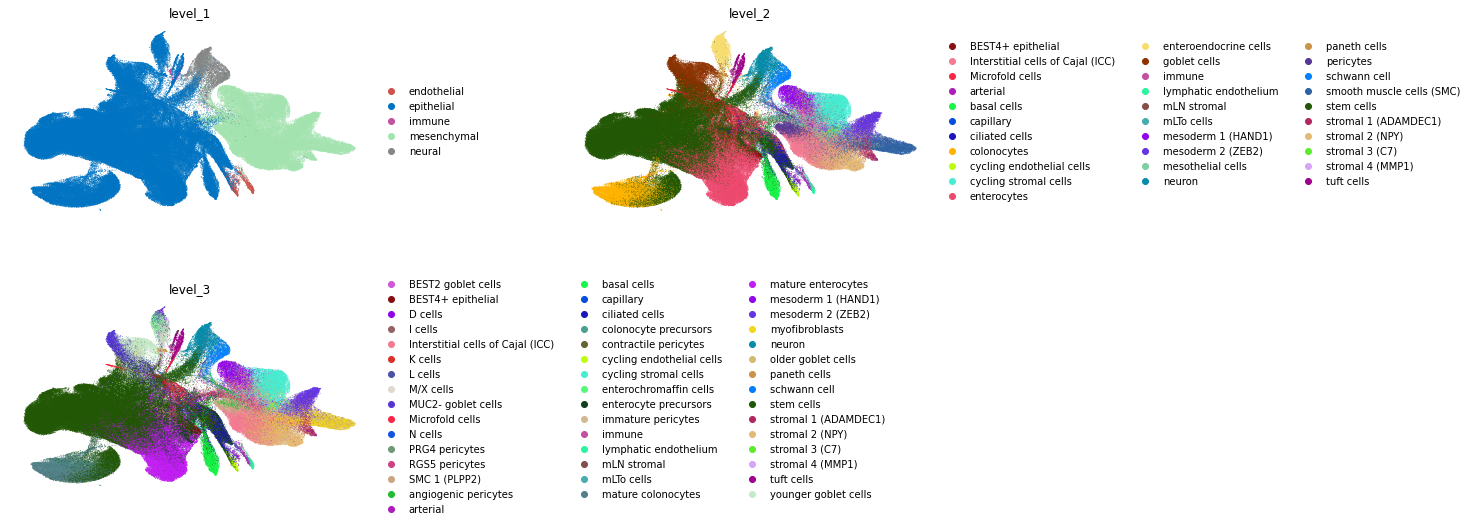

In [10]:

sc.pl.umap(adata, color=["level_1","level_2","level_3"], hspace=0.4, wspace=0.4,
       ncols=2, frameon=False, size=2, show=False, palette=plate_level_all)



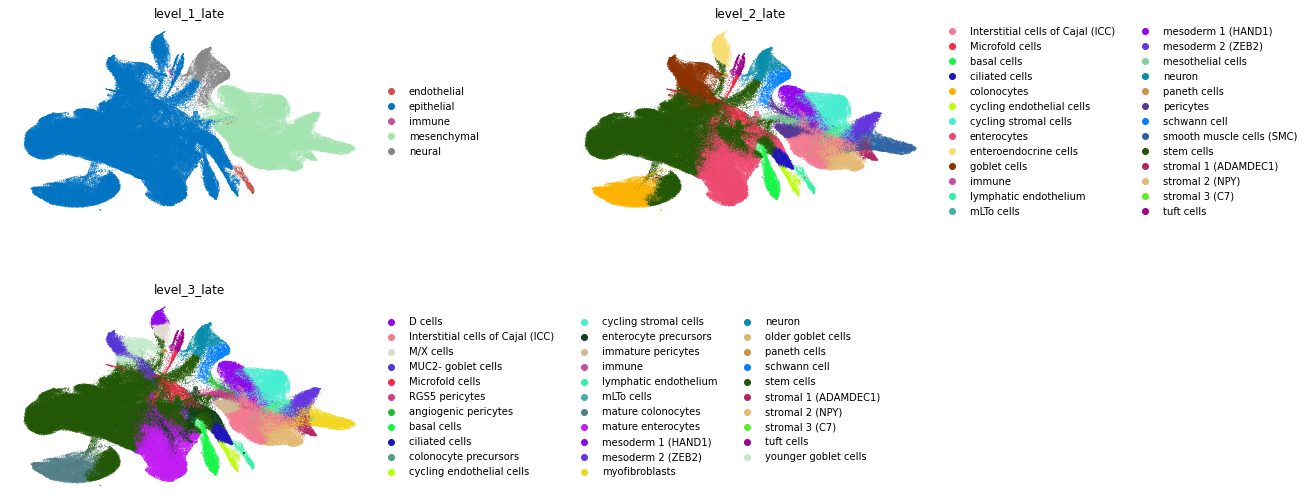

In [11]:

sc.pl.umap(adata, color=["level_1_late","level_2_late","level_3_late"], hspace=0.4, wspace=0.4,
       ncols=2, frameon=False, size=2, palette=plate_level_all)



[<Axes: title={'center': 'level_1_late'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'level_2_late'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'level_3_late'}, xlabel='UMAP1', ylabel='UMAP2'>]

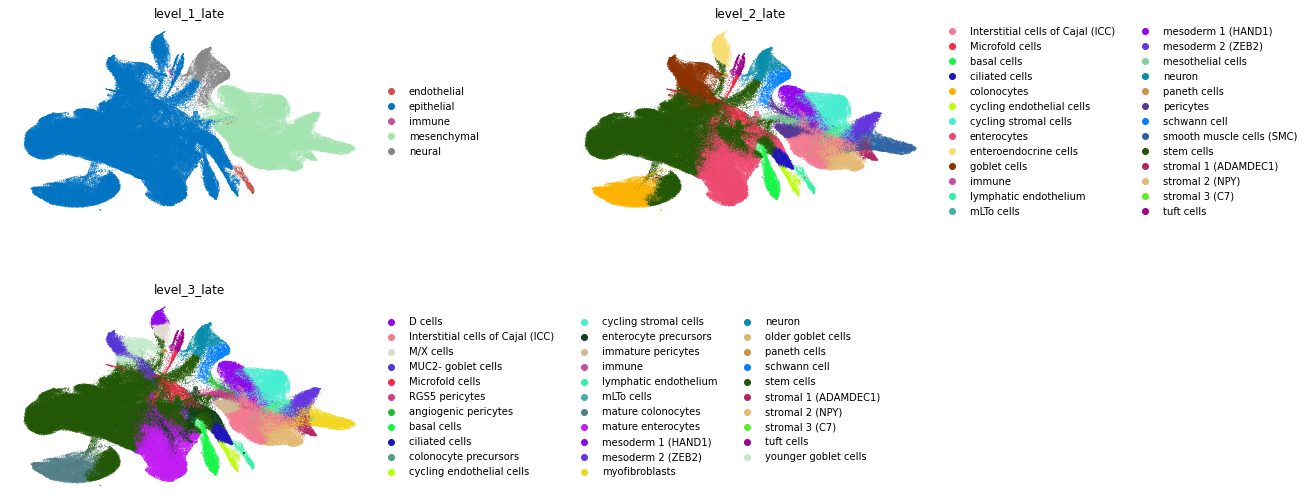

In [12]:

sc.pl.umap(adata, color=["level_1_late","level_2_late","level_3_late"], hspace=0.4, wspace=0.4,
       ncols=2, frameon=False, size=2, show=False, palette=plate_level_all)



### plot 3 level for final figures

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

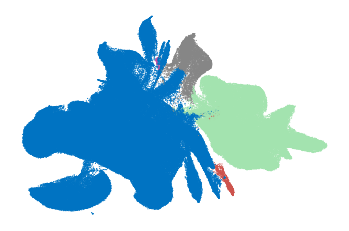

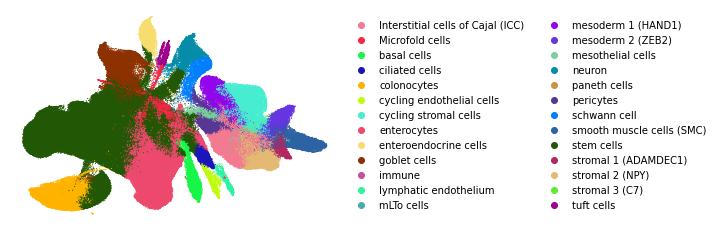

In [15]:

sc.pl.umap(adata, color=["level_1_late"], title='', legend_loc=None, 
           vmax=1, palette=plate_level_all, ncols=1, frameon=False, size=5, show=False)

sc.pl.umap(adata, color=["level_2_late"], title='',
           vmax=1, palette=plate_level_all, ncols=1, frameon=False, size=5, show=False)


### plot markers

[<Axes: title={'center': 'CDX2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'LGALS4'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ASCL2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'SI'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'CEACAM7'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'CHGA'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'MUC2'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'SPIB'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'ELAVL3'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'CDH5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'PDGFRB'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'WT1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'DES'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'NPY'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'C7'}, xlabel='UMAP1', ylabel='U

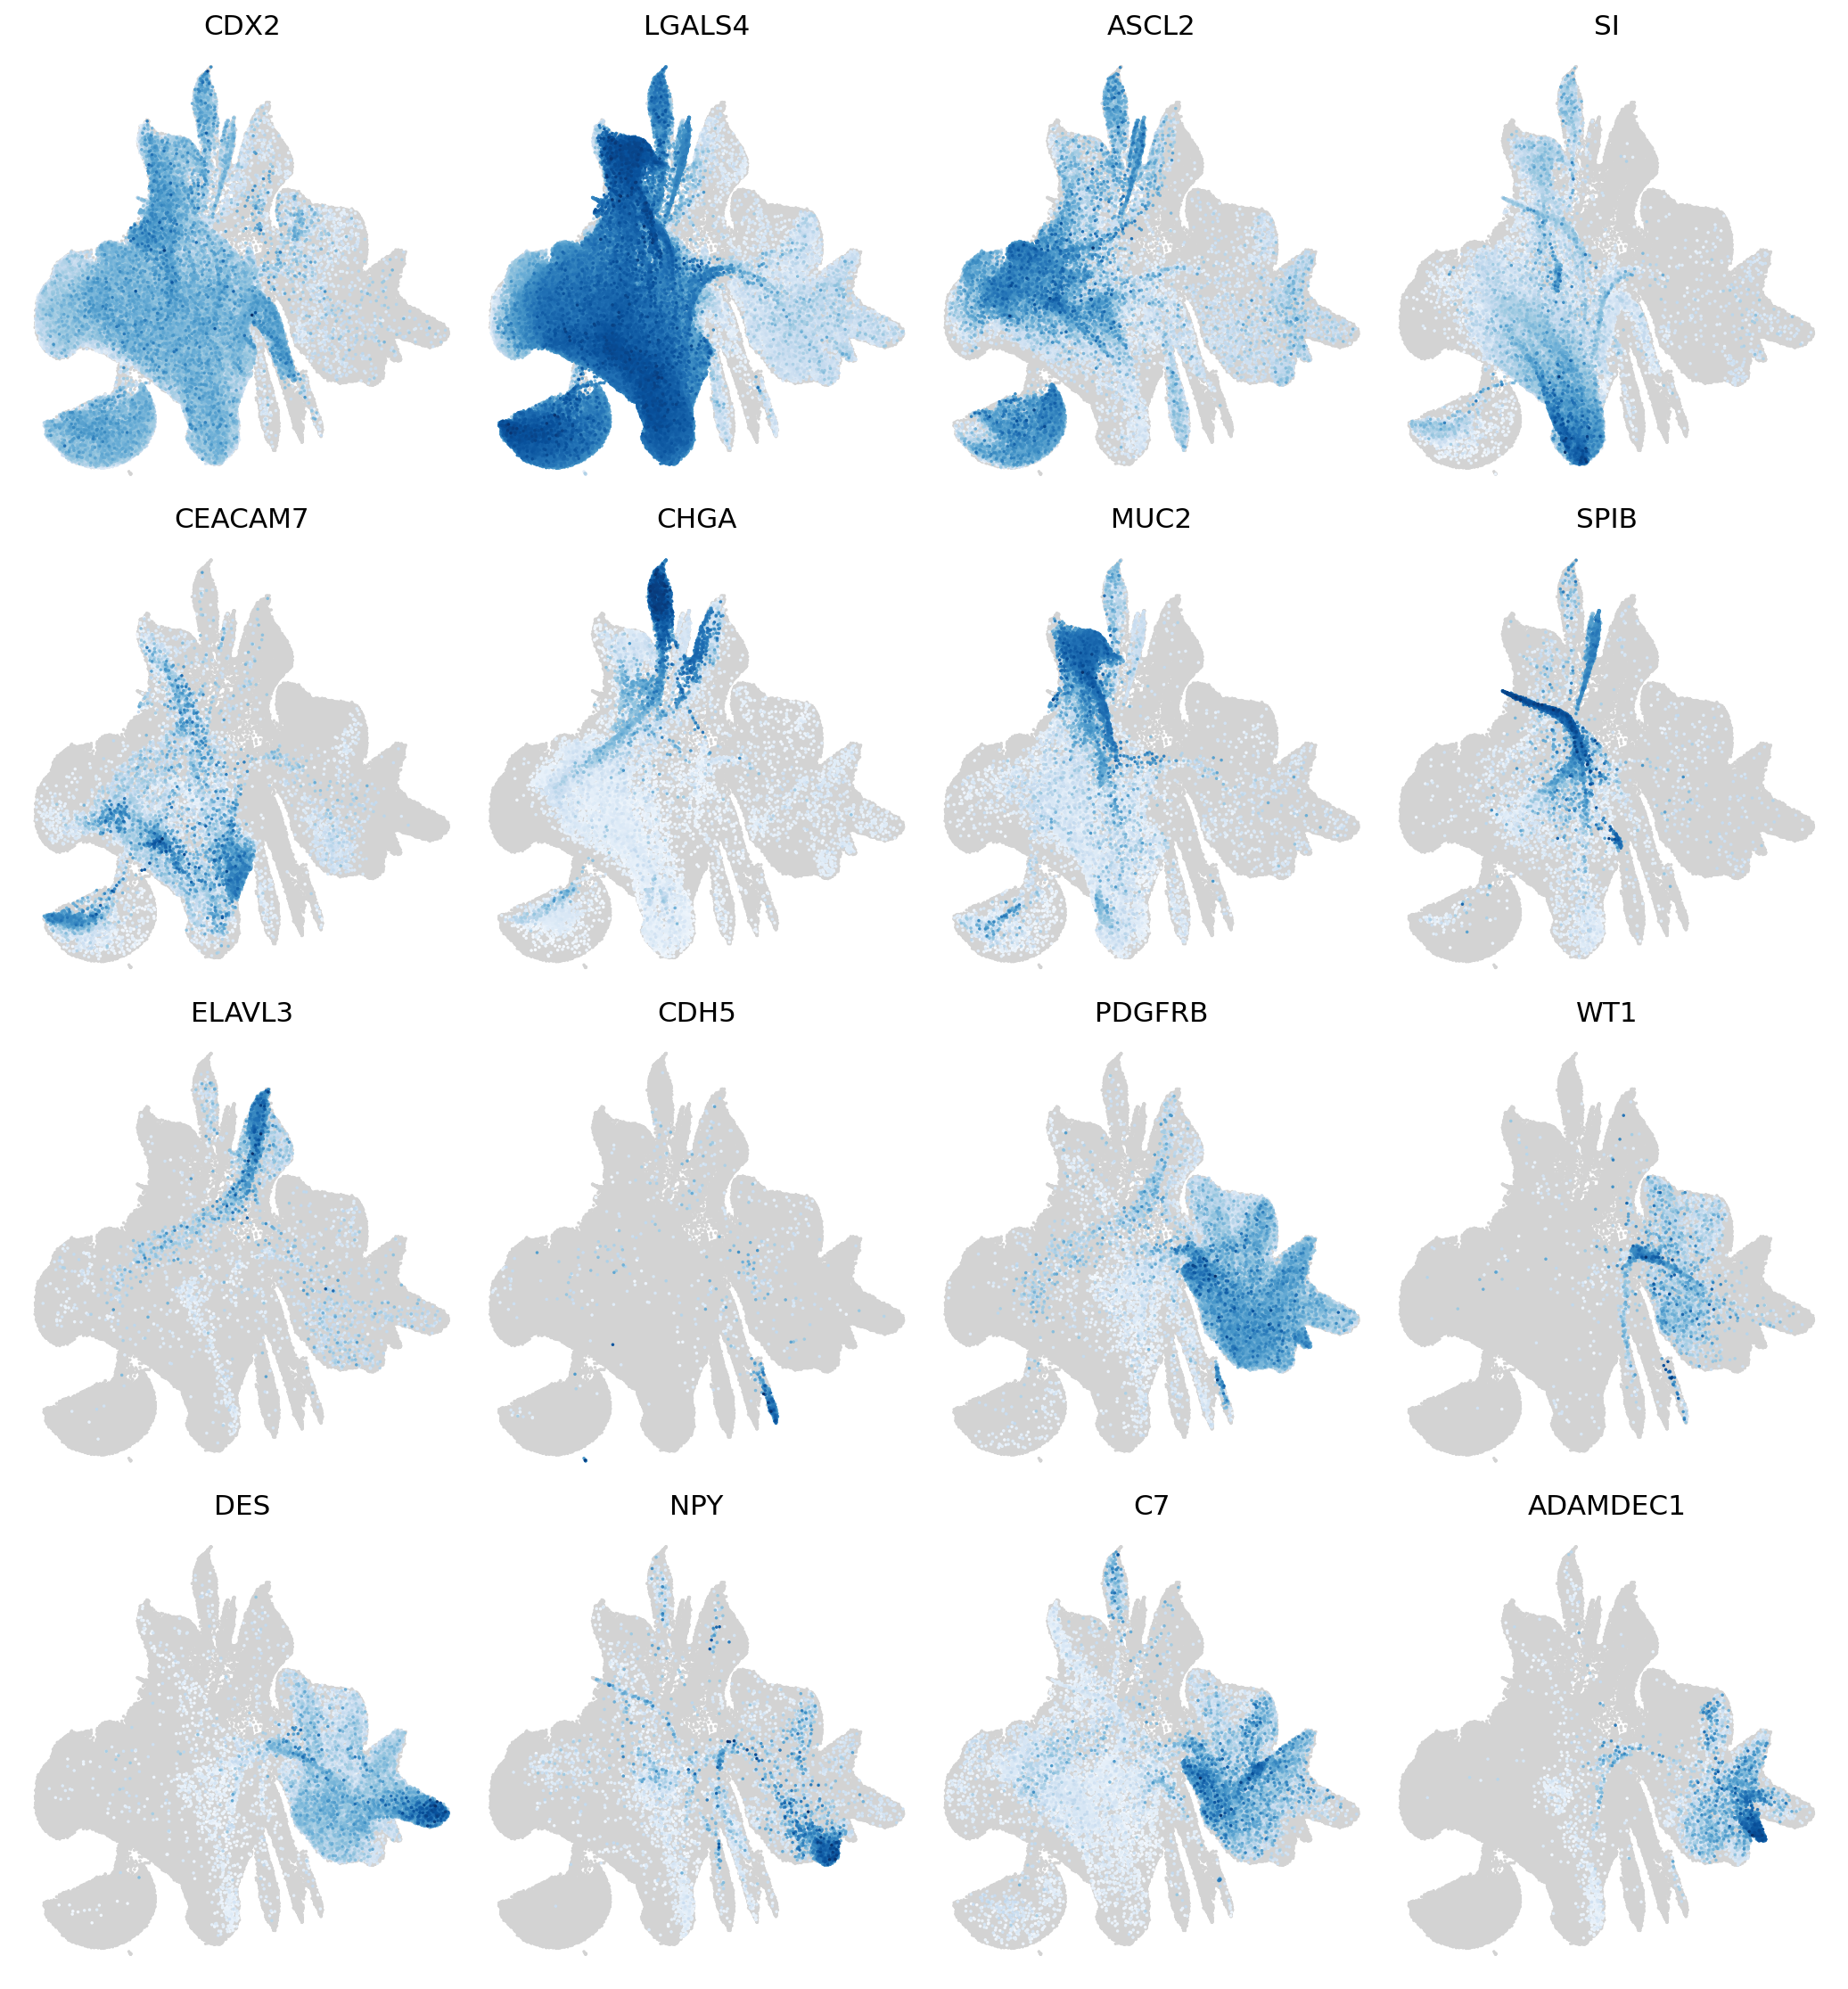

In [16]:
gns = copy(mpl.cm.Blues)
gns.set_under("lightgray")
import matplotlib.pyplot as plt
sc.settings.set_figure_params(transparent=True)

sc.pl.umap(adata, color=['CDX2', 'LGALS4', "ASCL2", "SI", "CEACAM7",
                    'CHGA', "MUC2", "SPIB","ELAVL3",'CDH5', 
                     'PDGFRB', 'WT1', 'DES', 'NPY','C7','ADAMDEC1'
                    ], 
           vmin=0.01, color_map=gns, hspace=0.1, wspace=0,
           legend_loc=None, colorbar_loc=None, show=False, 
           ncols=4, frameon=False, size=10)


## map to primary (fetal/adult)

In [17]:
adata_latent_source = sc.read_h5ad(f"{project_dir}/db/fetal_adult_atlas/scpoli_ref/adata_latent_source.h5ad")


In [18]:
mk_col4={}
mk_col4['Enterocyte']=plate_level_all['enterocytes']
mk_col4['Enteroendocrine']=plate_level_all['enteroendocrine cells']
mk_col4['Enterocyte_precursor']= '#1f77b4'
mk_col4['Goblet']=plate_level_all['goblet cells']
mk_col4['M_cell']=plate_level_all['Microfold cells']
mk_col4['Stem_cell']=plate_level_all['stem cells']
mk_col4['Tuft']=plate_level_all['tuft cells']


<Axes: title={'center': 'Cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

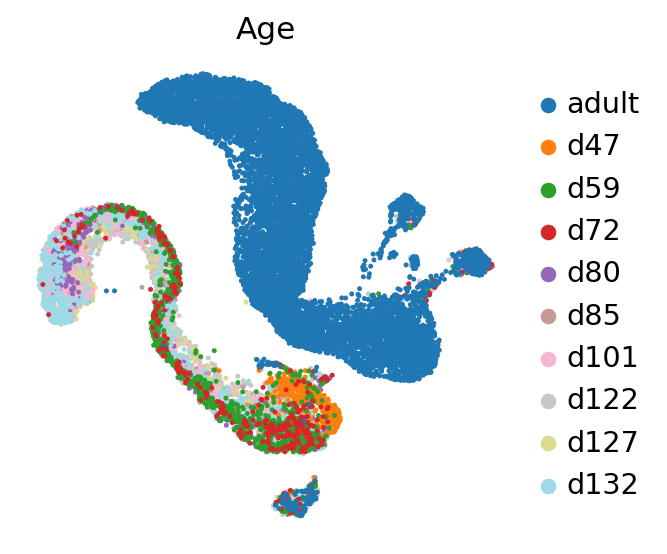

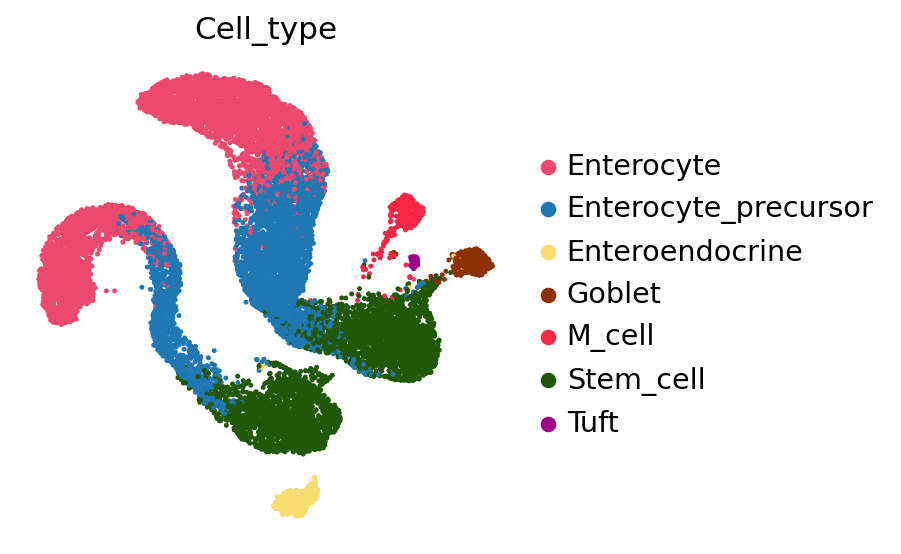

In [19]:
sc.pl.umap(adata_latent_source, color=['Age'], 
           ncols=3, frameon=False, size=20, palette='tab20', show=False)

sc.pl.umap(adata_latent_source, color=["Cell_type"], 
           ncols=3, frameon=False, size=20, palette=mk_col4, show=False)


In [20]:
map_results = pd.read_csv(f"{project_dir}/db/fetal_adult_atlas/hio_map_res.txt", 
                          sep='\t', index_col=0)
adata_latent=sc.AnnData(X=np.empty((len(map_results),2)), obs=map_results)

adata_latent.obsm['X_umap'] = adata_latent.obs[['predict_primary_UMAP1','predict_primary_UMAP2']].to_numpy()

adata_latent.obs = pd.merge(adata_latent.obs,adata.obs[['sample_id','derive','derive2']], 
                            left_index=True, right_index=True, how='left')



In [21]:
mk_col4={}
for i,j in zip(adata_latent_source.obs.Cell_type.cat.categories,
    adata_latent_source.uns['Cell_type_colors']):
    mk_col4[i]=j

mk_col4

{'Enterocyte': '#ed496fff',
 'Enterocyte_precursor': '#1f77b4ff',
 'Enteroendocrine': '#f7dc6fff',
 'Goblet': '#8e3101ff',
 'M_cell': '#f82745ff',
 'Stem_cell': '#225805ff',
 'Tuft': '#9e018aff'}

<Axes: title={'center': 'ASC'}, xlabel='UMAP1', ylabel='UMAP2'>

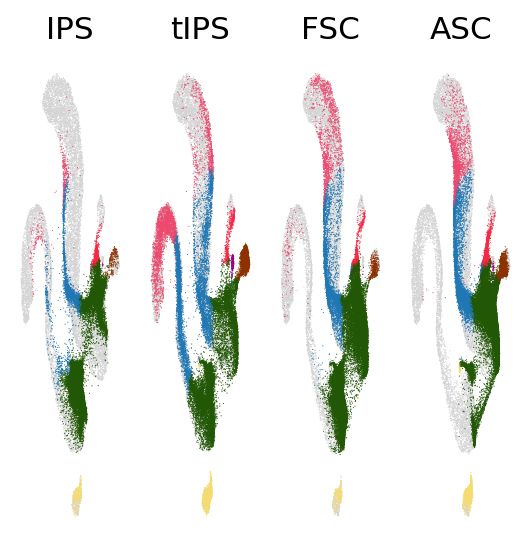

In [22]:

fig, axs = plt.subplots(1, 4)

mk_col3={'IPS':'#4DBBD5FF',
     'tIPS': '#00A087FF',
     'FSC early': '#8491B4FF',
     'FSC late': '#3C5488FF',
     'ASC': '#E64B35FF'}

mk_col4={}
for i,j in zip(adata_latent_source.obs.Cell_type.cat.categories,
    adata_latent_source.uns['Cell_type_colors']):
    mk_col4[i]=j


sc.pl.umap(anndata.AnnData.concatenate(*[adata_latent[adata_latent.obs.derive2=='IPS'], 
                              adata_latent_source], join='outer', fill_value=0), 
            color='predict_primary_Cell_type', show=False, ax=axs[0], frameon=False, size=1, 
           palette=mk_col4, legend_loc=None, title='IPS')

sc.pl.umap(anndata.AnnData.concatenate(*[adata_latent[adata_latent.obs.derive2=='tIPS'], 
                              adata_latent_source], join='outer', fill_value=0), 
           color='predict_primary_Cell_type', show=False, ax=axs[1], frameon=False, size=1, 
           palette=mk_col4, legend_loc=None, title='tIPS')

sc.pl.umap(anndata.AnnData.concatenate(*[adata_latent[adata_latent.obs.derive2.isin(['FSC early', 'FSC late'])], 
                              adata_latent_source], join='outer', fill_value=0),
           color='predict_primary_Cell_type', show=False, ax=axs[2], frameon=False, size=1, 
           palette=mk_col4, legend_loc=None, title='FSC')

sc.pl.umap(anndata.AnnData.concatenate(*[adata_latent[adata_latent.obs.derive2=='ASC'], 
                              adata_latent_source], join='outer', fill_value=0),
           color='predict_primary_Cell_type', show=False, ax=axs[3], frameon=False, size=1, 
           palette=mk_col4, legend_loc=None, title='ASC')



## plot mature

In [23]:
epi_obs = adata[(adata.obs.predict_tissue=='intestine') & 
                  (adata.obs.prob_primary_adult.notna())].obs.copy()


epi_obs.time = epi_obs.time.astype('string')
epi_obs.derive = epi_obs.derive.astype('string')

epi_obs.loc[epi_obs.time=='early','time']='110day'
epi_obs.loc[epi_obs.time=='late','time']='120day'

epi_obs.loc[epi_obs.protocol=='transplant','derive']='tIPS'

epi_obs.loc[epi_obs.time=='110day','derive']='FSC'
epi_obs.loc[epi_obs.time=='120day','derive']='FSC'

epi_obs.loc[epi_obs.derive=='ASC','time']='130day'

epi_obs['int_time'] = [int(i[:-3]) if i.endswith('day') else int(i[:-4])*7 for i in epi_obs.time]

epi_obs = epi_obs.sort_values(['derive','prob_primary_adult'])

In [24]:
mk_col = epi_obs[['sample_id','derive']].reset_index(drop=True) \
        .drop_duplicates().set_index('sample_id').to_dict()['derive']

mk_col2={}
for i in mk_col:
    if mk_col[i]=='IPS':
        mk_col2[i]='#4DBBD5FF'
    if mk_col[i]=='tIPS':
        mk_col2[i]='#00A087FF'
    if mk_col[i]=='FSC':
        mk_col2[i]='#8491B4FF'
    if mk_col[i]=='FSC late':
        mk_col2[i]='#8491B4FF'
    if mk_col[i]=='ASC':
        mk_col2[i]='#E64B35FF'

mk_col3={'IPS':'#4DBBD5FF',
     'tIPS': '#00A087FF',
     'FSC': '#3C5488FF',
     'ASC': '#E64B35FF'}


### ips proportion

In [25]:
ips_epi_obs = adata[((adata.obs.predict_tissue=='intestine') & 
                  (adata.obs.derive.isin(['IPS','tIPS'])) &
                  (adata.obs.detail_tissue!='colon') &
                  (adata.obs.prob_primary_adult.notna())).tolist()].obs.copy()

int_times=[]
for i in ips_epi_obs.time:
    if i.endswith('day'):
        int_times.append(int(i[:-3]))
    elif i.endswith('week'):
        int_times.append(int(i[:-4])*7)
        
ips_epi_obs['int_time']=int_times


In [26]:

cell_prop=pd.DataFrame()

sample_ids=[]
for i in ips_epi_obs.sample_id.unique():
    sample_count = ips_epi_obs[ips_epi_obs.sample_id==i].groupby('predict_primary_Cell_type')\
                .count()['prob_primary_adult']

    sample_count = pd.DataFrame(sample_count)
    cell_prop = pd.merge(cell_prop, sample_count, how='outer',
                                 left_index=True, right_index=True)
    
    cell_prop= cell_prop.fillna(0)
    cell_prop[i]=cell_prop['prob_primary_adult']/sum(cell_prop['prob_primary_adult'])
    cell_prop = cell_prop.drop('prob_primary_adult', axis=1)
    
    sample_ids.append(i)


In [27]:
cell_prop2 = cell_prop.T.copy()

cell_prop2 = pd.merge(cell_prop2, pd.DataFrame(ips_epi_obs[['sample_id','int_time']])\
                              .reset_index(drop=True).drop_duplicates()\
                              .set_index('sample_id'),
         left_index=True, right_index=True, how='left')

cell_prop2 = cell_prop2[cell_prop2.int_time.notna()]
# cell_prop2.int_time = [int(i[:-3]) for i in cell_prop2.int_time]
cell_prop2 = cell_prop2.sort_values(['int_time', 'Stem_cell'], ascending=[True, False])
int_time =cell_prop2.int_time

cell_prop2 = cell_prop2.drop('int_time', axis=1).T


Text(0, 0.5, 'Cell proportion')

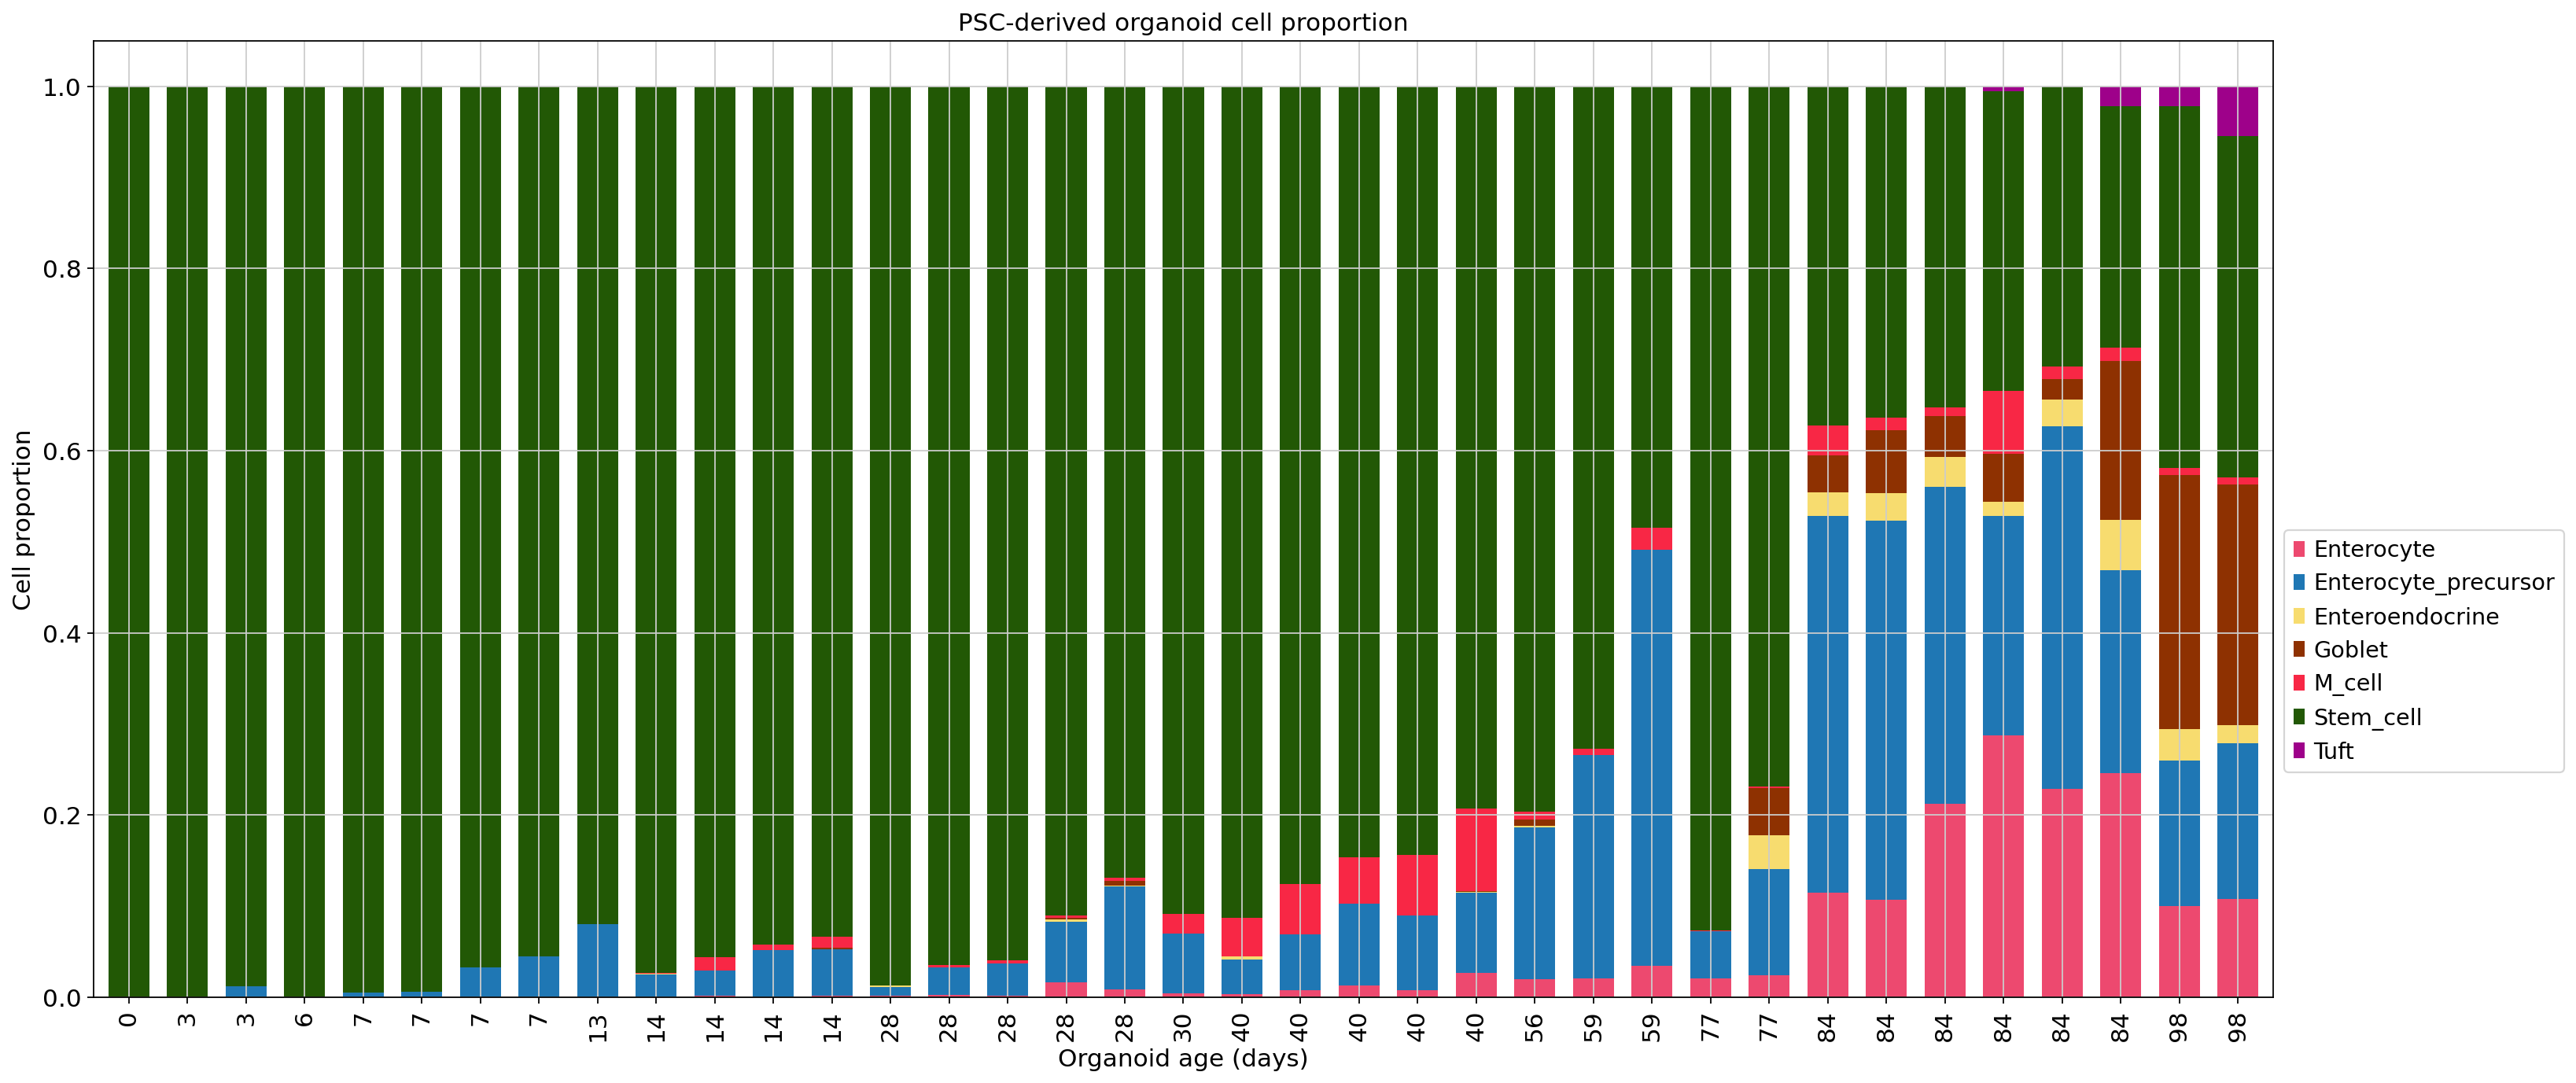

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(cell_prop2.shape[1]*0.6, 10))

cell_prop2.T.plot.bar(stacked=True, ax=ax, width=0.7, 
                      color=adata_latent_source.uns['Cell_type_colors']
)

ax.legend().set_visible(False)
ax.legend(bbox_to_anchor=(1, 0.5))

ax.set_xticklabels(int_time);
ax.set(title='PSC-derived organoid cell proportion')
ax.set_xlabel('Organoid age (days)')
ax.set_ylabel('Cell proportion')


<Axes: >

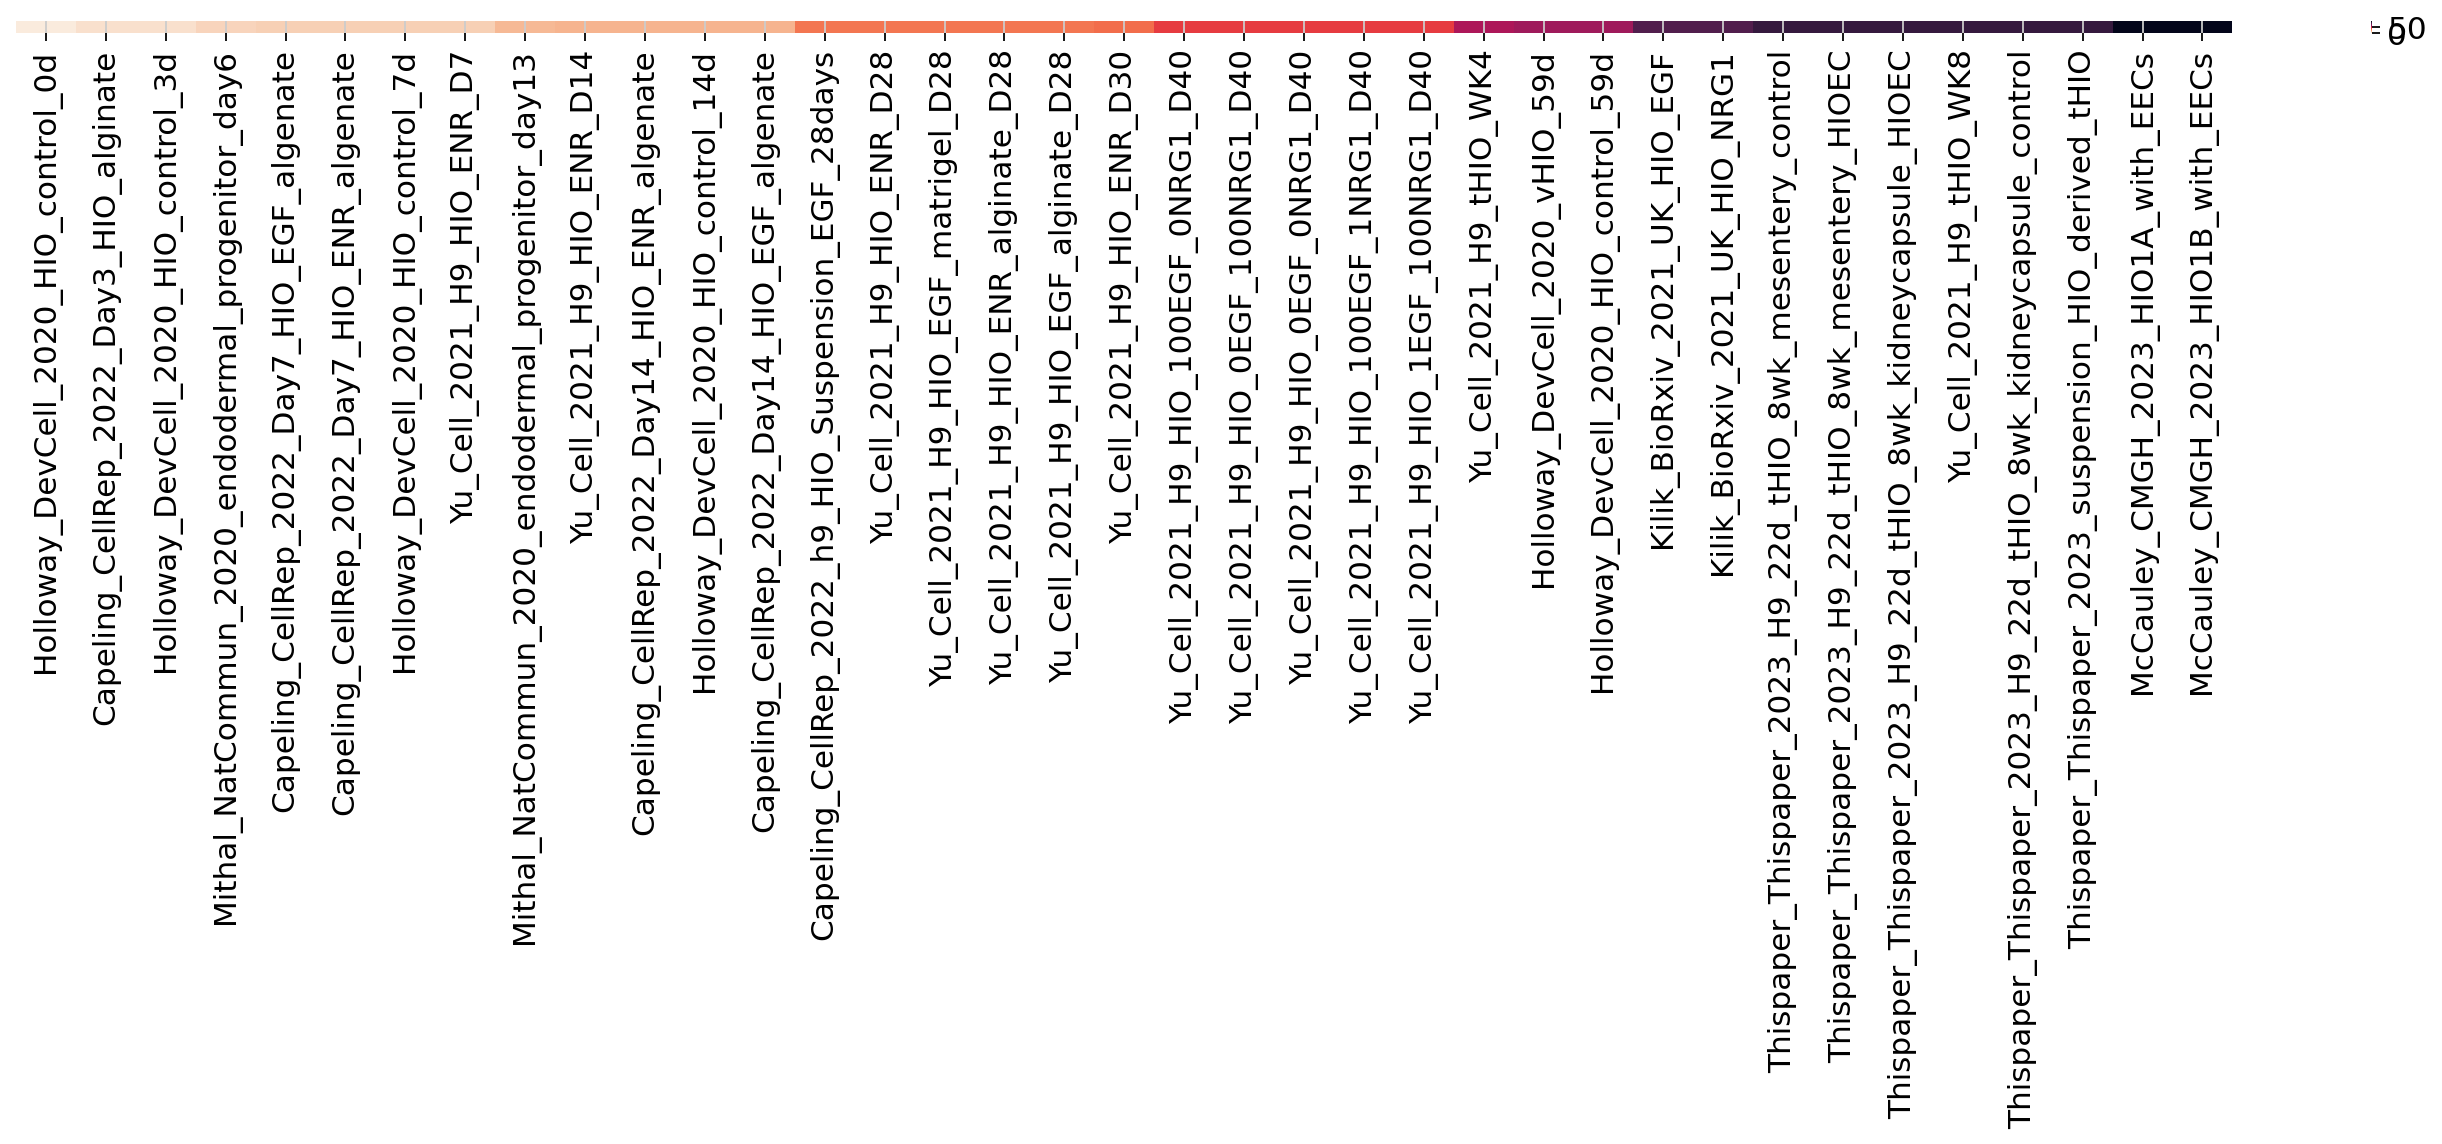

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(cell_prop2.shape[1]*0.6, 0.1))
sns.heatmap(pd.DataFrame(int_time).T[::-1], cmap='rocket_r')


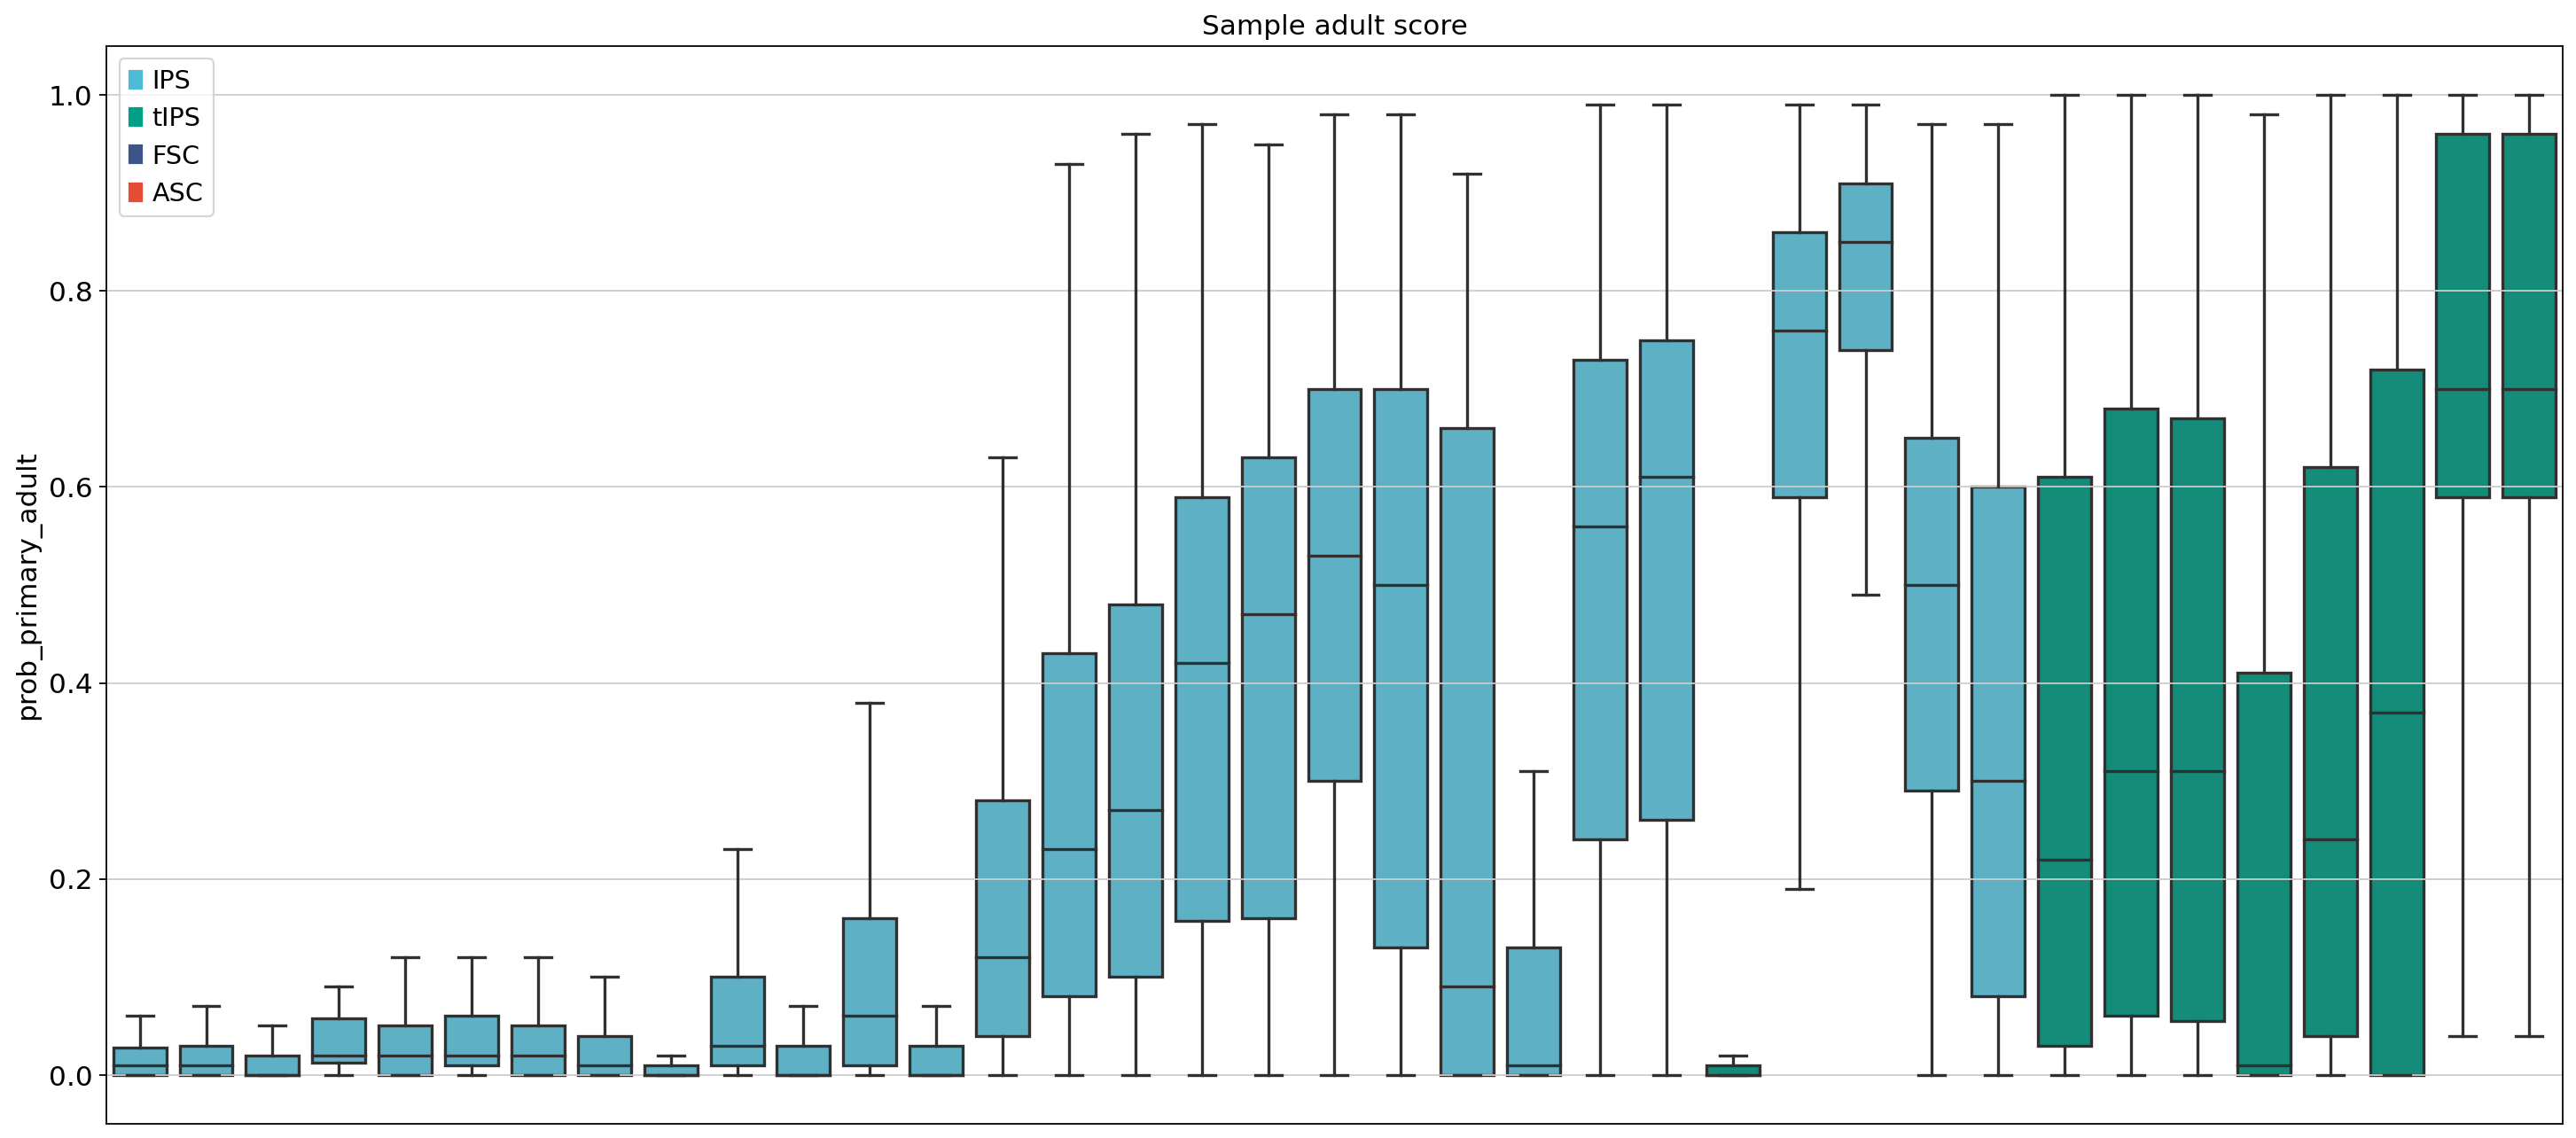

In [31]:
order = cell_prop2.columns
fig, ax = plt.subplots(figsize=(cell_prop2.shape[1]*0.6, 10))
ax = sns.boxplot(x='sample_id', y="prob_primary_adult", data=epi_obs[epi_obs.sample_id.isin(cell_prop2)], 
                 order=order, palette=mk_col2, 
                 showfliers=False)

ax.set(xticklabels=[])  
ax.set(title='Sample adult score')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

# add legend
all_patchs = []
for i in mk_col3:
    all_patchs.append(mpatches.Patch(color=mk_col3[i], label=i))
plt.legend(handles=all_patchs)



### FSC proportion

In [32]:
fsc_epi_obs = adata[((adata.obs.predict_tissue=='intestine') & 
                  (adata.obs.derive.isin(['FSC'])) &
                  (adata.obs.detail_tissue!='colon') &
                  (adata.obs.prob_primary_adult.notna())).tolist()].obs.copy()


In [33]:

cell_prop=pd.DataFrame()

sample_ids=[]
for i in fsc_epi_obs.sample_id.unique():
    sample_count = fsc_epi_obs[fsc_epi_obs.sample_id==i].groupby('predict_primary_Cell_type')\
                .count()['prob_primary_adult']

    sample_count = pd.DataFrame(sample_count)
    cell_prop = pd.merge(cell_prop, sample_count, how='outer',
                                 left_index=True, right_index=True)
    
    cell_prop= cell_prop.fillna(0)
    cell_prop[i]=cell_prop['prob_primary_adult']/sum(cell_prop['prob_primary_adult'])
    cell_prop = cell_prop.drop('prob_primary_adult', axis=1)
    
    sample_ids.append(i)


In [34]:
cell_prop2 = cell_prop.T.copy()

cell_prop2 = pd.merge(cell_prop2, pd.DataFrame(ips_epi_obs[['sample_id']])\
                              .reset_index(drop=True).drop_duplicates()\
                              .set_index('sample_id'),
         left_index=True, right_index=True, how='left')

cell_prop2 = cell_prop2.sort_values(['Stem_cell'], ascending=[True])[::-1]



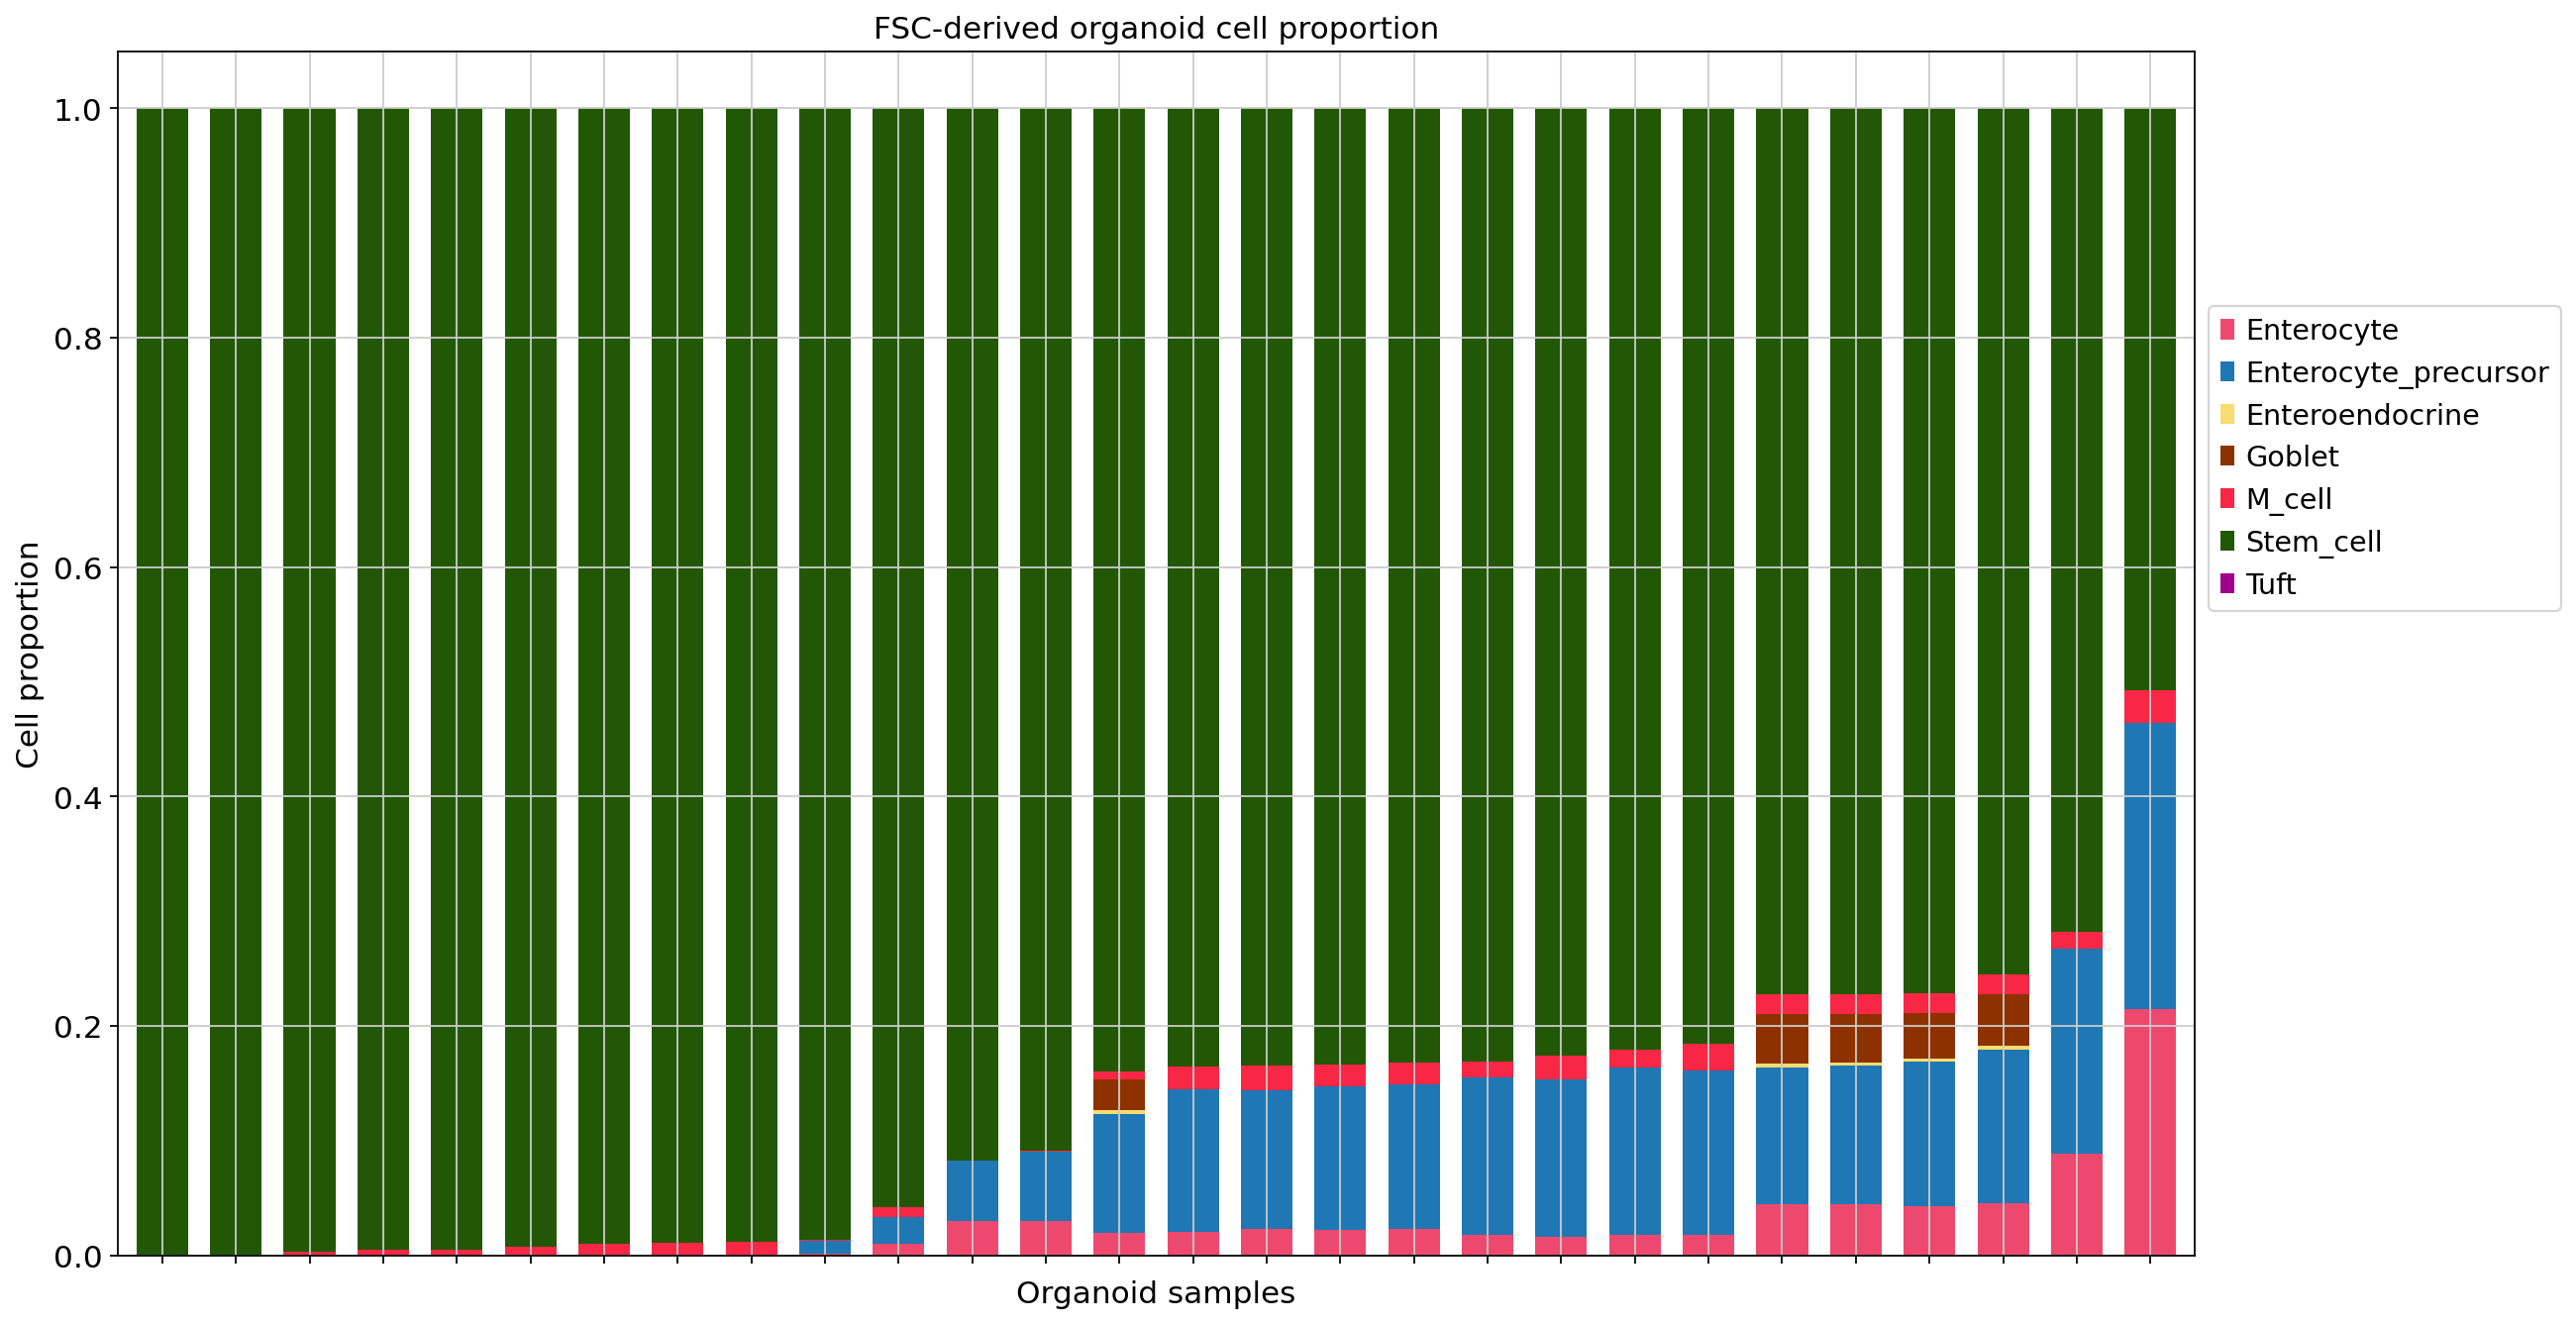

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(cell_prop2.shape[0]*0.6, 10))

cell_prop2.plot.bar(stacked=True, ax=ax, width=0.7, 
                      color=adata_latent_source.uns['Cell_type_colors']
)

ax.legend().set_visible(False)
ax.legend(bbox_to_anchor=(1, 0.8))

ax.set(title='FSC-derived organoid cell proportion')
ax.set_xlabel('Organoid samples')
ax.set_ylabel('Cell proportion')
ax.set_xticklabels('');



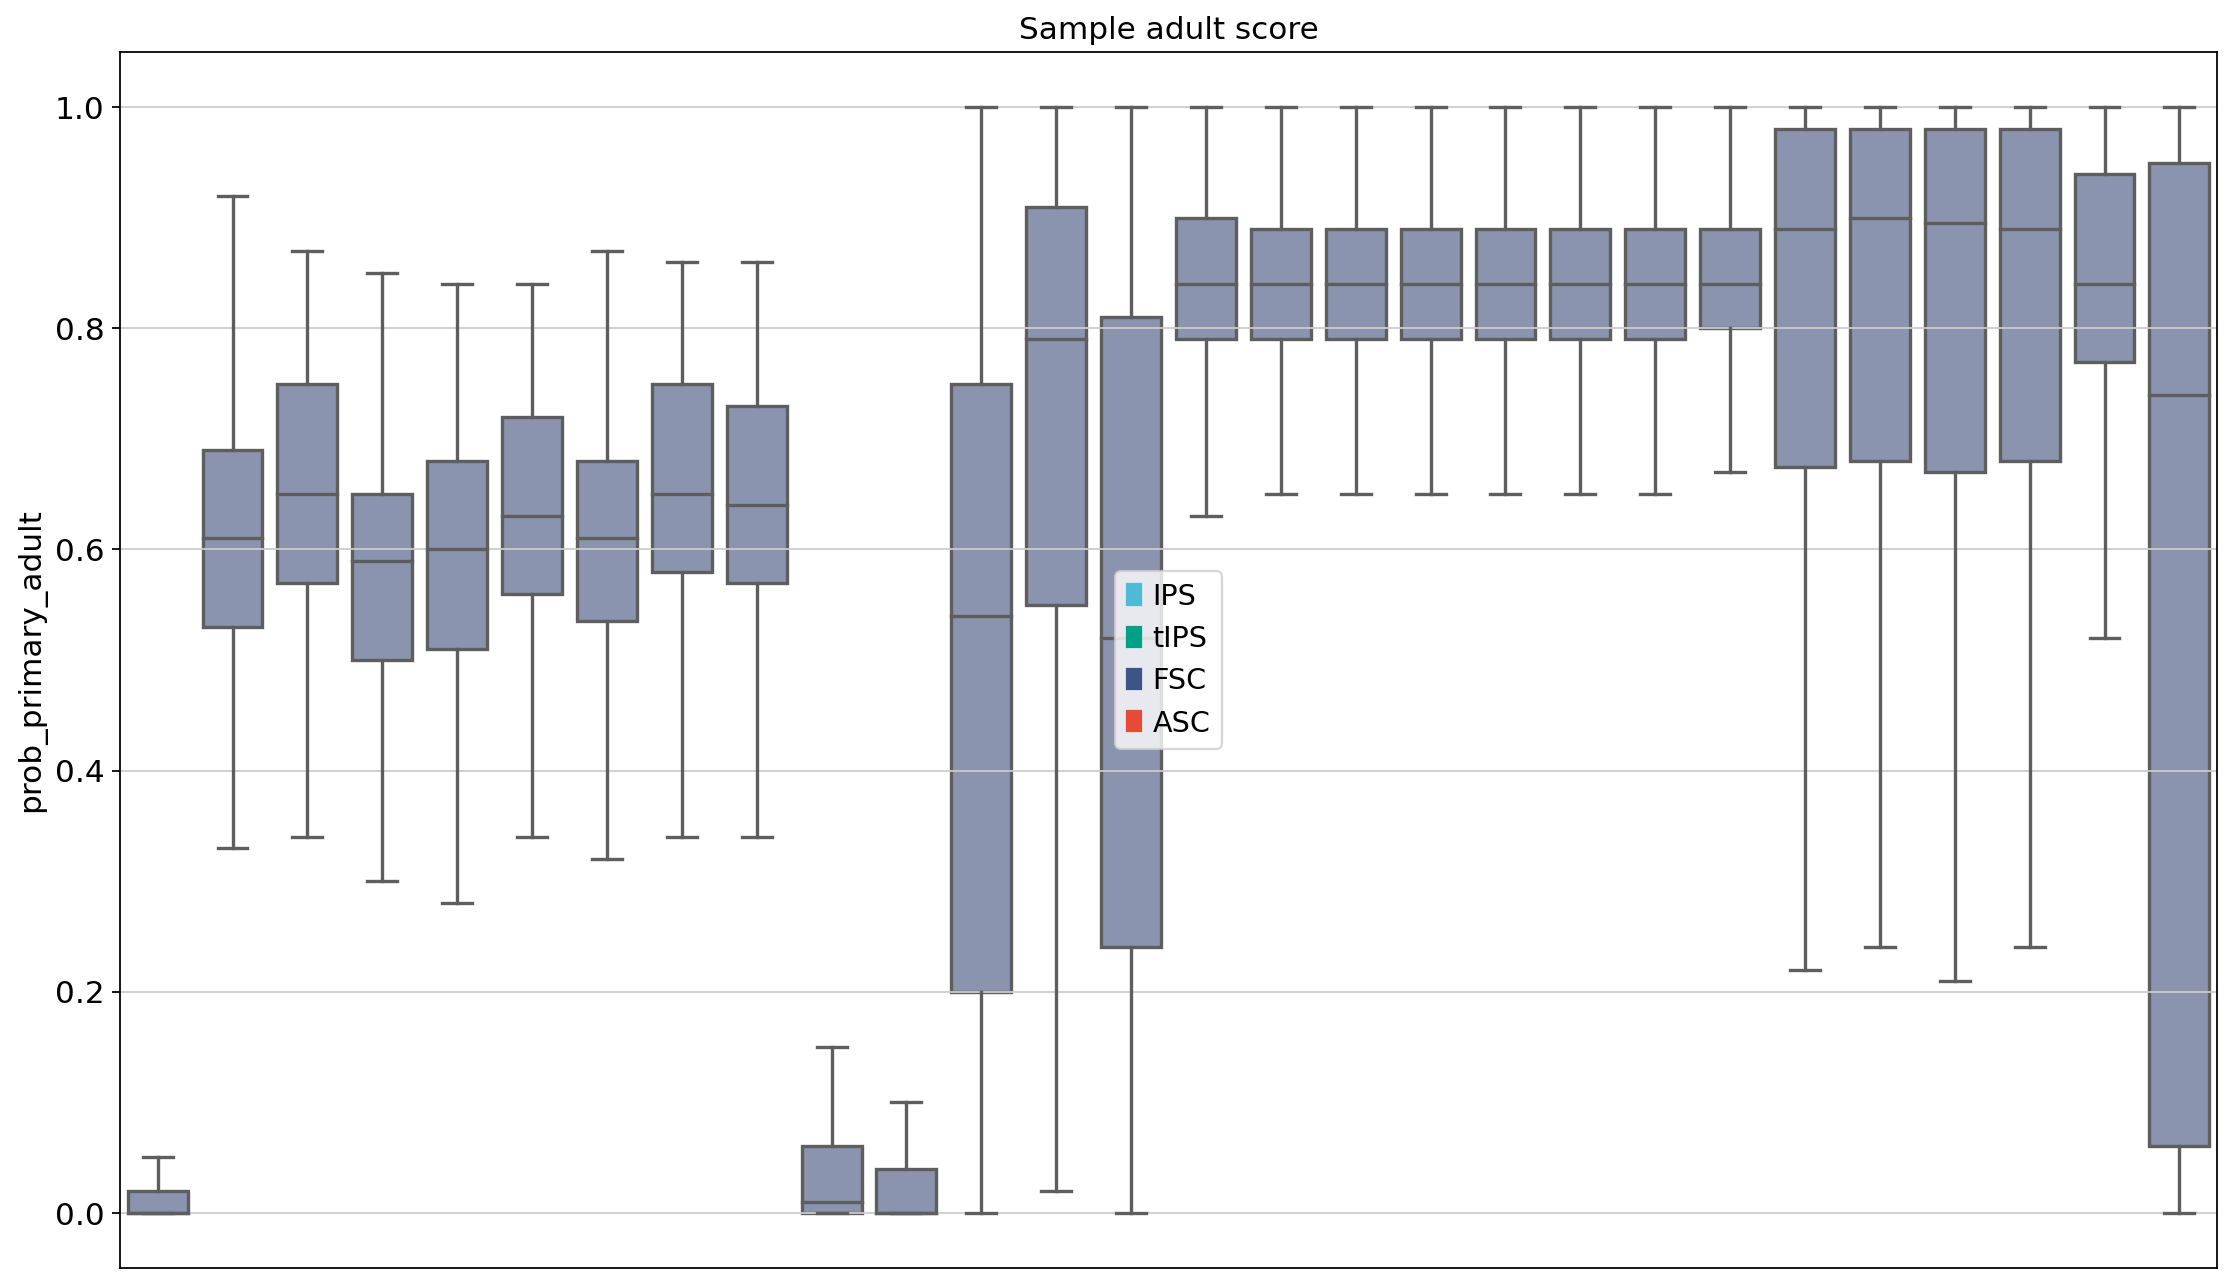

In [36]:
cell_prop2 = cell_prop2.T
order = cell_prop2.columns
fig, ax = plt.subplots(figsize=(cell_prop2.shape[1]*0.6, 10))
ax = sns.boxplot(x='sample_id', y="prob_primary_adult", data=epi_obs[epi_obs.sample_id.isin(cell_prop2)], 
                 order=order, palette=mk_col2, 
                 showfliers=False)

ax.set(xticklabels=[])  
ax.set(title='Sample adult score')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

# add legend
all_patchs = []
for i in mk_col3:
    all_patchs.append(mpatches.Patch(color=mk_col3[i], label=i))
plt.legend(handles=all_patchs)



### ASC proportion

In [37]:
fsc_epi_obs = adata[((adata.obs.predict_tissue=='intestine') & 
                  (adata.obs.derive.isin(['ASC'])) &
                  (adata.obs.detail_tissue!='colon') &
                  (adata.obs.prob_primary_adult.notna())).tolist()].obs.copy()


In [38]:

cell_prop=pd.DataFrame()

sample_ids=[]
for i in fsc_epi_obs.sample_id.unique():
    sample_count = fsc_epi_obs[fsc_epi_obs.sample_id==i].groupby('predict_primary_Cell_type')\
                .count()['prob_primary_adult']

    sample_count = pd.DataFrame(sample_count)
    cell_prop = pd.merge(cell_prop, sample_count, how='outer',
                                 left_index=True, right_index=True)
    
    cell_prop= cell_prop.fillna(0)
    cell_prop[i]=cell_prop['prob_primary_adult']/sum(cell_prop['prob_primary_adult'])
    cell_prop = cell_prop.drop('prob_primary_adult', axis=1)
    
    sample_ids.append(i)


In [39]:
cell_prop2 = cell_prop.T.copy()

cell_prop2 = pd.merge(cell_prop2, pd.DataFrame(ips_epi_obs[['sample_id']])\
                              .reset_index(drop=True).drop_duplicates()\
                              .set_index('sample_id'),
         left_index=True, right_index=True, how='left')

cell_prop2 = cell_prop2.sort_values(['Stem_cell'], ascending=[True])[::-1]



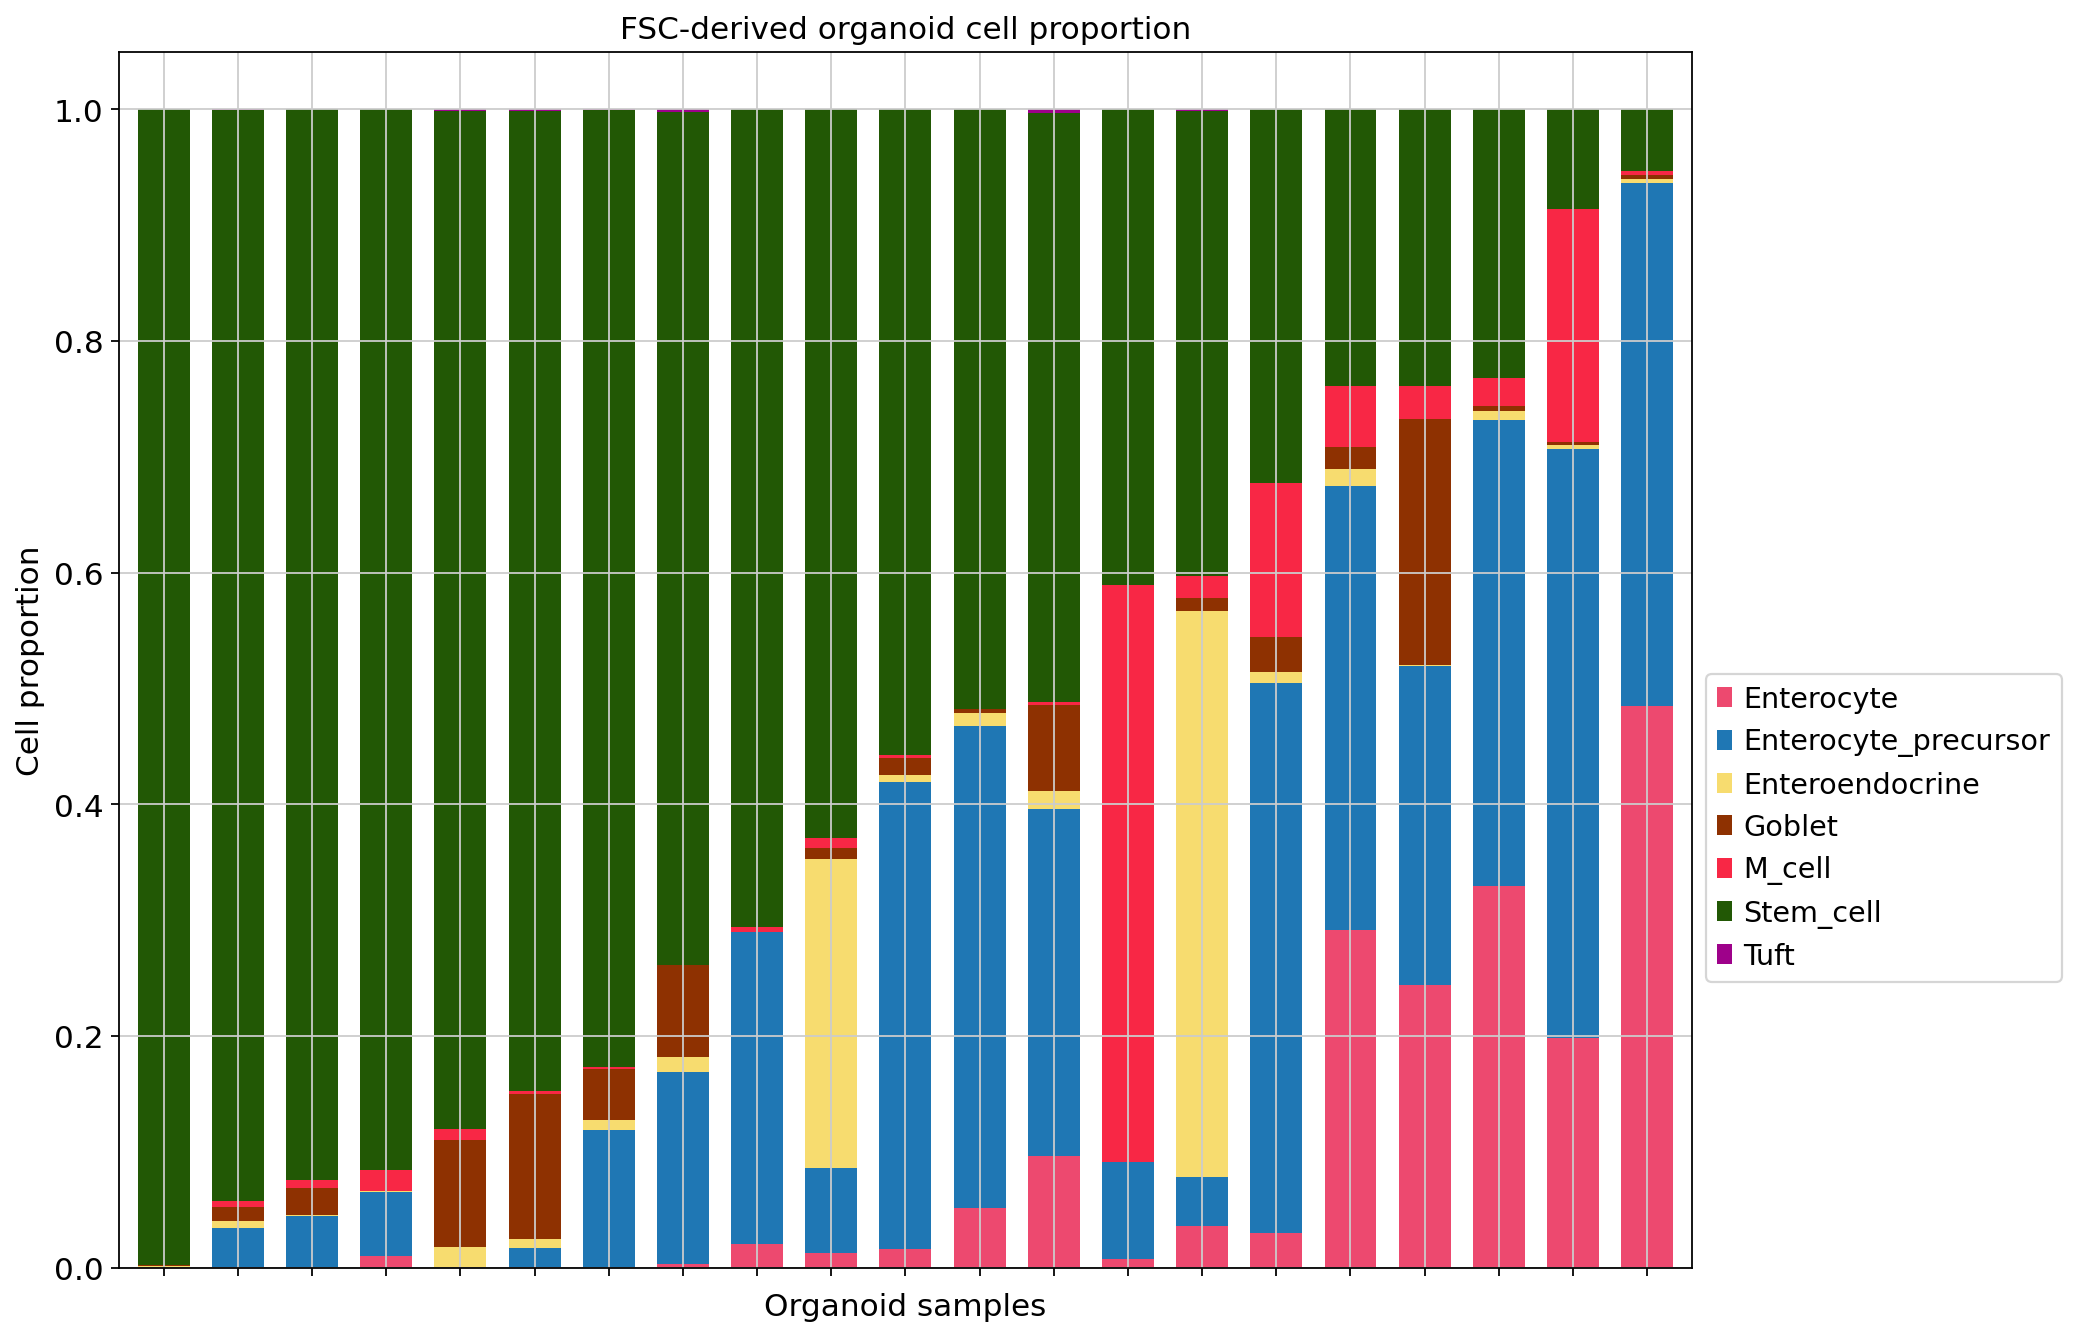

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(cell_prop2.shape[0]*0.6, 10))

cell_prop2.plot.bar(stacked=True, ax=ax, width=0.7, 
                      color=adata_latent_source.uns['Cell_type_colors']
)

ax.legend().set_visible(False)
ax.legend(bbox_to_anchor=(1, 0.5))

ax.set(title='FSC-derived organoid cell proportion')
ax.set_xlabel('Organoid samples')
ax.set_ylabel('Cell proportion')
ax.set_xticklabels('');



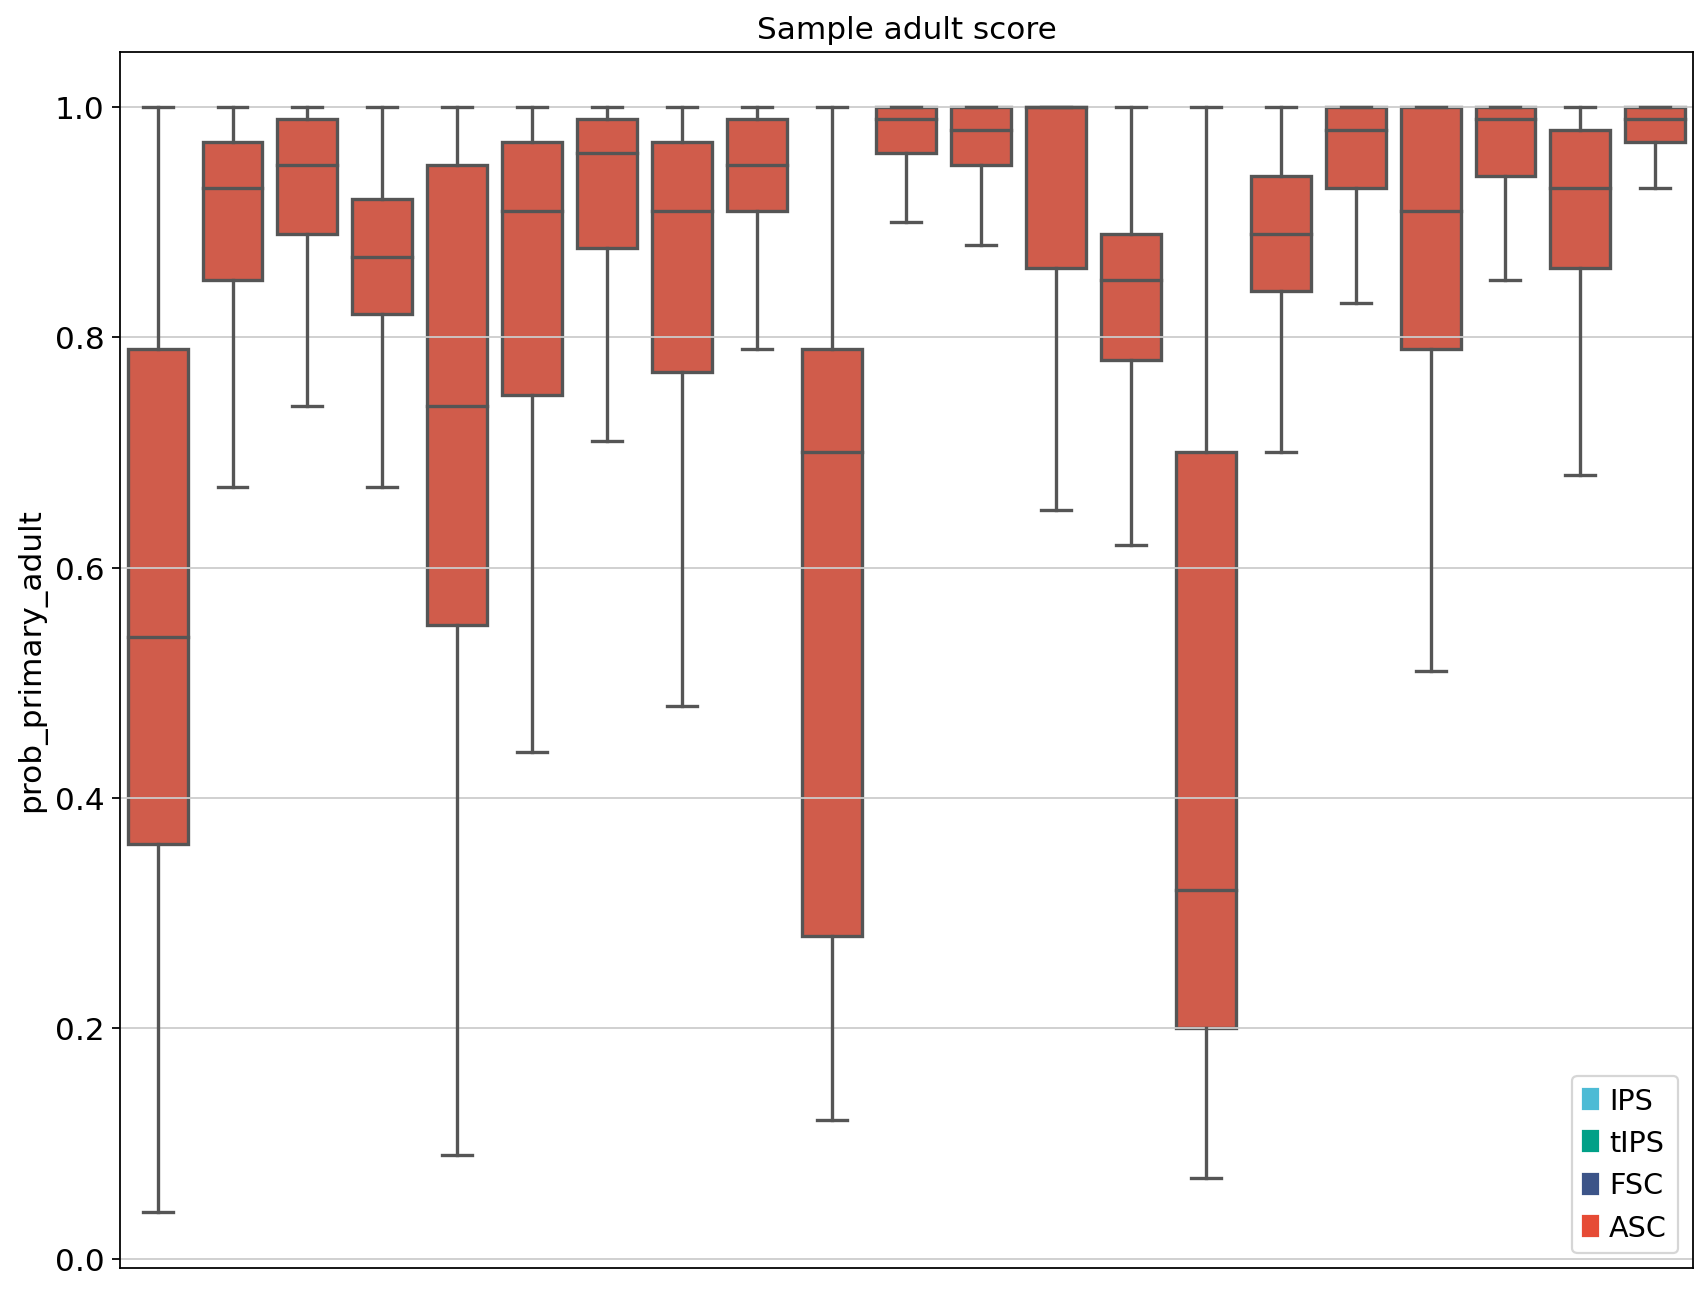

In [41]:
cell_prop2 = cell_prop2.T
order = cell_prop2.columns
fig, ax = plt.subplots(figsize=(cell_prop2.shape[1]*0.6, 10))
ax = sns.boxplot(x='sample_id', y="prob_primary_adult", data=epi_obs[epi_obs.sample_id.isin(cell_prop2)], 
                 order=order, palette=mk_col2, 
                 showfliers=False)

ax.set(xticklabels=[])  
ax.set(title='Sample adult score')
ax.set(xlabel=None)
ax.tick_params(bottom=False)  # remove the ticks

# add legend
all_patchs = []
for i in mk_col3:
    all_patchs.append(mpatches.Patch(color=mk_col3[i], label=i))
plt.legend(handles=all_patchs)


## pesudotime

### entrocytes

In [43]:
ent_cells = pd.DataFrame(pd.read_csv(f"{project_dir}/results/new_20230705/intestine_scpoli_model/stemcells2entrocytes_pt.txt",
                        sep='\t', index_col=0)['velocity_pseudotime'])
ent_cells.head()


velocity_pseudotime
cells                                  
AAACCCAAGGATCATA-7             0.365685
AAACGAAGTCTACAAC-7             0.376501
AAACGCTAGTTGCCCG-7             0.184912
AAAGTCCAGGTTGCCC-7             0.075496
AAAGTCCTCCTACACC-7             0.302654

In [44]:
ent_adata = adata[adata.obs.index.isin(ent_cells.index)].copy()
ent_adata.obs = pd.merge(ent_adata.obs, ent_cells, left_index=True, right_index=True)

In [45]:
ent_raw_exp = pd.DataFrame(ent_adata.raw.X.toarray(), 
                       index=ent_adata.obs_names, 
                       columns=ent_adata.raw.var_names)

scale_pt = ent_adata.obs.velocity_pseudotime.to_numpy().argsort().argsort().reshape(-1, 1)
scale_pt_norm = MinMaxScaler().fit_transform(scale_pt)

ent_adata.obs['scale_pt_norm']=scale_pt_norm

ent_raw_exp['bins']=ent_adata.obs.scale_pt_norm.round(1)



### colonocytes

In [47]:
col_cells = pd.read_csv(f"{project_dir}/results/new_20230705/intestine_scpoli_model/stemcells2colonocytes_pt.txt",
                        sep='\t', index_col=0)[['latent_time','velocity_pseudotime']]
col_cells.head()

latent_time  velocity_pseudotime
cells                                                
AACTTCTAGGACTGGT-15     0.140269             0.459423
CCGGTAGGTACGTAGG-15     0.127375             0.374399
CCGTTCAGTAGGGAGG-15     0.160355             0.465402
CGTGATACAGCGTTGC-15     0.098335             0.384012
GGCAGTCCAACCCTCT-15     0.173725             0.489200

In [48]:
col_adata = adata[adata.obs.index.isin(col_cells.index)].copy()
col_adata.obs = pd.merge(col_adata.obs, col_cells, left_index=True, right_index=True)

In [49]:
col_raw_exp = pd.DataFrame(col_adata.raw.X.toarray(), 
                       index=col_adata.obs_names, 
                       columns=col_adata.raw.var_names)


scale_pt = col_adata.obs.velocity_pseudotime.to_numpy().argsort().argsort().reshape(-1, 1)
scale_pt_norm = MinMaxScaler().fit_transform(scale_pt)
col_adata.obs['scale_pt_norm']=scale_pt_norm
col_raw_exp['bins']=col_adata.obs.scale_pt_norm.round(1)



Text(0, 0.5, 'CEACAM7')

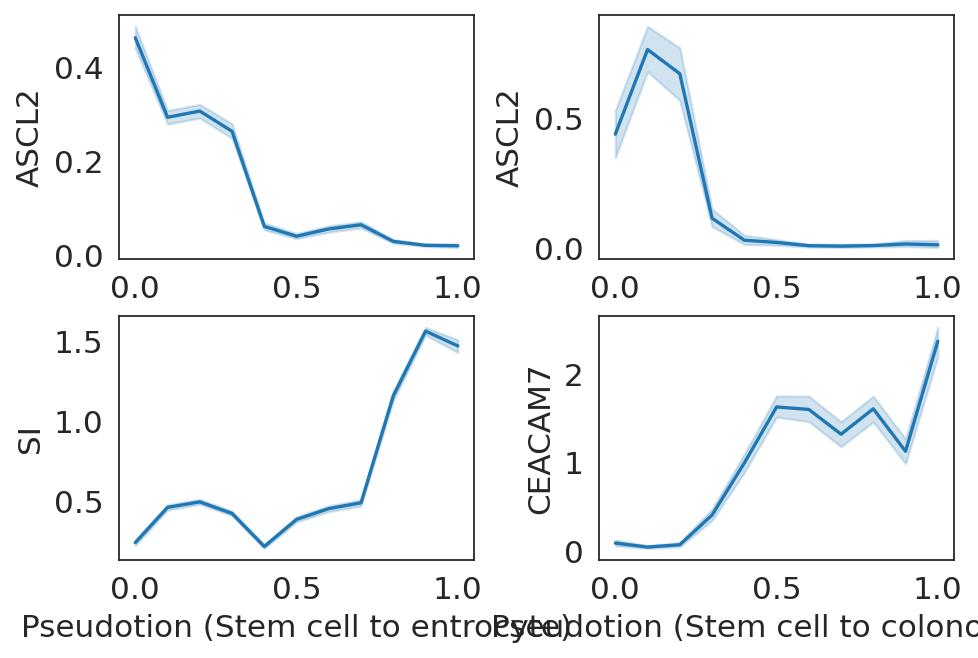

In [51]:

sns.set_style("white", {'axes.grid' : False})
mpl.rcParams['pdf.fonttype'] = 42

genes=['ASCL2','SI']

fig, axs = plt.subplots(2, 2, figsize=(6, 4), constrained_layout=True)

sns.lineplot(data=pd.melt(ent_raw_exp[[genes[0], 'bins']], id_vars='bins'), 
             x="bins", y='value', ax=axs[0,0])
axs[0,0].set(title='')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel(genes[0])

sns.lineplot(data=pd.melt(ent_raw_exp[[genes[1], 'bins']], id_vars='bins'), 
             x="bins", y='value', ax=axs[1,0])
axs[1,0].set(title='')
axs[1,0].set_xlabel('Pseudotion (Stem cell to entrocyte)')
axs[1,0].set_ylabel(genes[1])



genes=['ASCL2','CEACAM7']


sns.lineplot(data=pd.melt(col_raw_exp[[genes[0], 'bins']], id_vars='bins'), 
             x="bins", y='value', ax=axs[0,1])
axs[0,1].set(title='')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel(genes[0])

sns.lineplot(data=pd.melt(col_raw_exp[[genes[1], 'bins']], id_vars='bins'), 
             x="bins", y='value', ax=axs[1,1])
axs[1,1].set(title='')
axs[1,1].set_xlabel('Pseudotion (Stem cell to colonocyte)')
axs[1,1].set_ylabel(genes[1])

           

## others

In [52]:
adata.obs['organoid_UMAP1'] = adata.obsm['X_umap'][:,0]
adata.obs['organoid_UMAP2'] = adata.obsm['X_umap'][:,1]


<Axes: title={'center': 'derive'}, xlabel='UMAP1', ylabel='UMAP2'>

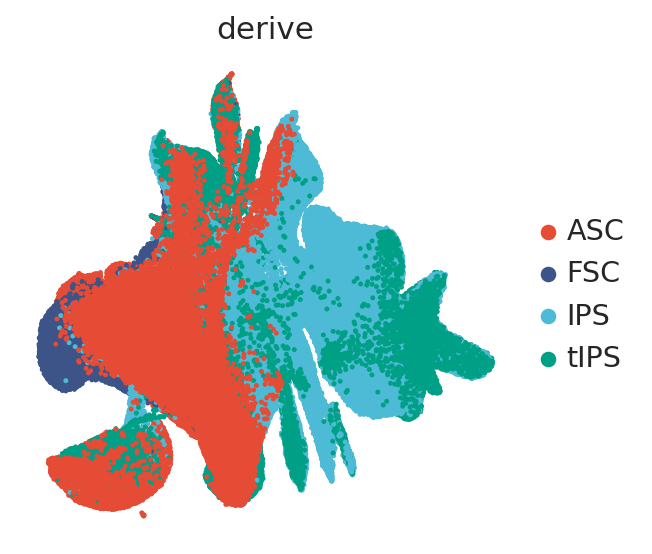

In [53]:
sc.pl.umap(adata, color=["derive"], palette=mk_col3, show=False,
       size=20, ncols=1, frameon=False)


In [54]:
adata.obs['detail_tissue2']=adata.obs['detail_tissue']
adata.obs.detail_tissue2= adata.obs.detail_tissue2.astype('string')

adata.obs.loc[adata.obs.derive=='IPS','detail_tissue2']='PSC'

<Axes: title={'center': 'detail_tissue2'}, xlabel='UMAP1', ylabel='UMAP2'>

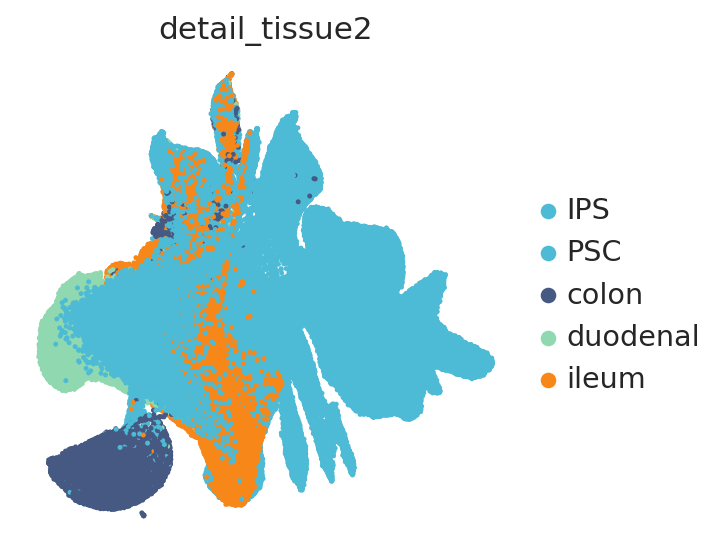

In [55]:
sc.pl.umap(adata, color=["detail_tissue2"], show=False, palette=plate_level_all,
       size=20, ncols=1, frameon=False)


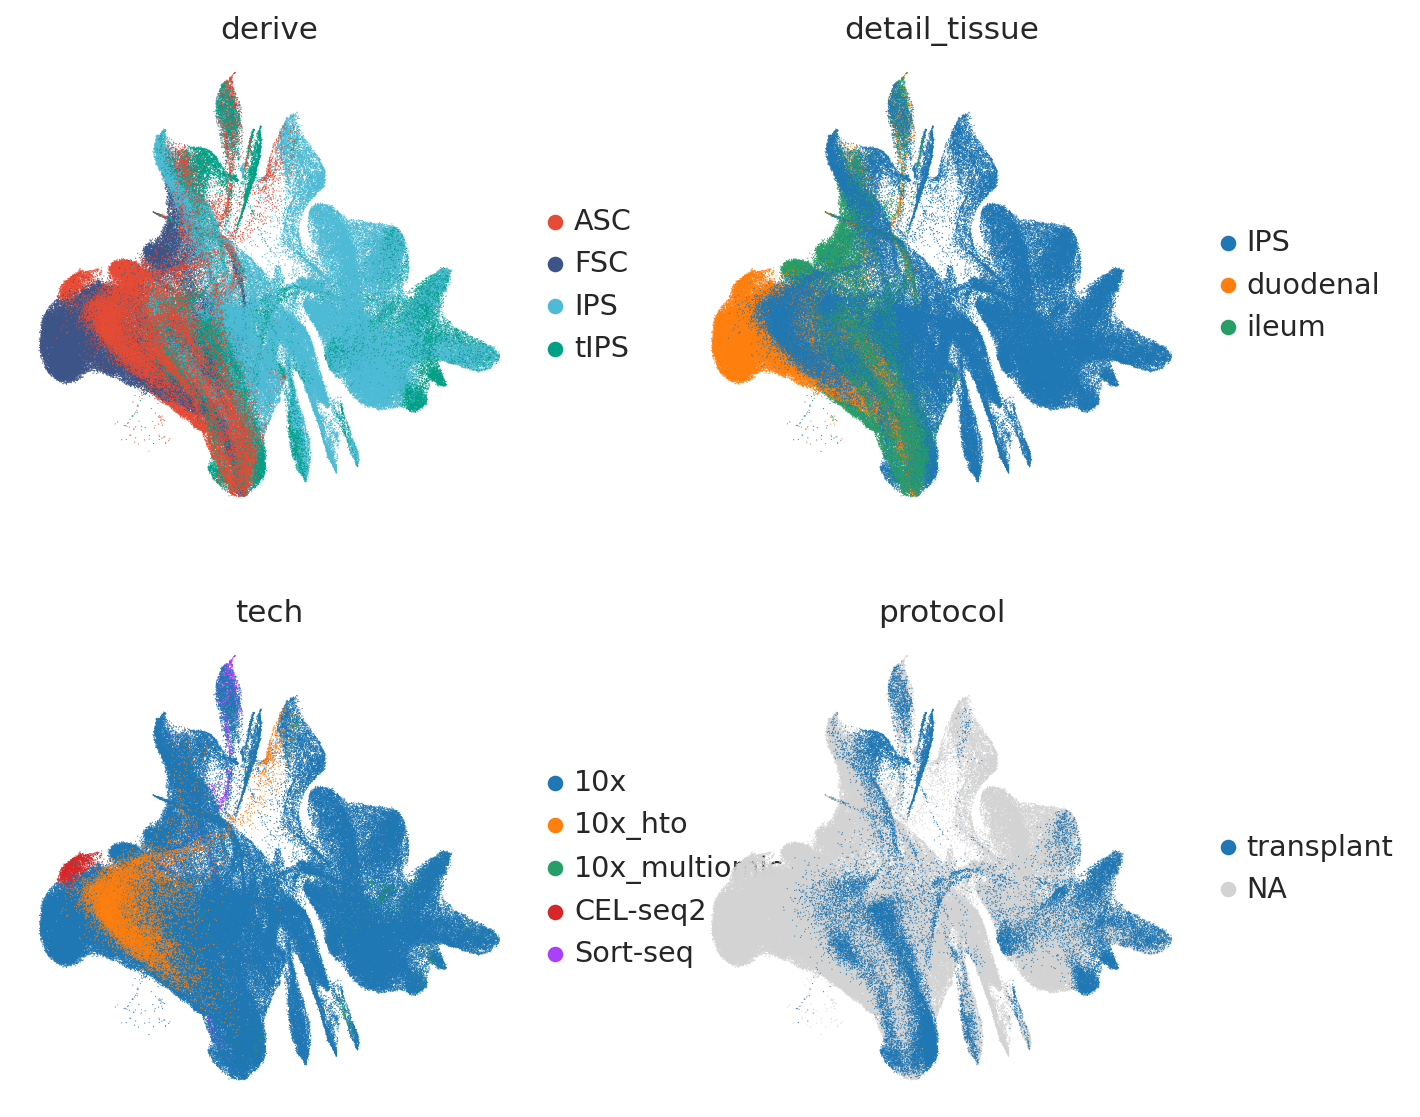

In [56]:

sc.pl.umap(adata[adata.obs.detail_tissue!='colon'], color=[
                         "derive", "detail_tissue", "tech", 
                         'protocol',], 
           size=1, ncols=2, frameon=False)
